In [2]:
import numpy as np
from assortativity import measures as m
import seaborn as sns
import bct
from scipy.stats import pearsonr, zscore, skew
import matplotlib.pyplot as plt
%matplotlib inline

## FIGURE 1
This is still Work in Progress...

In [35]:
r11_er = np.load("notebook_experiments/data/r11_er.npy")
r11_randNb = np.load("notebook_experiments/data/r11_randNb.npy")
la_p = np.load("notebook_experiments/results/r11_la_p.npy")
la_w = np.load("notebook_experiments/results/r11_la_w.npy")

Text(0, 0.5, 'Node Attribute')

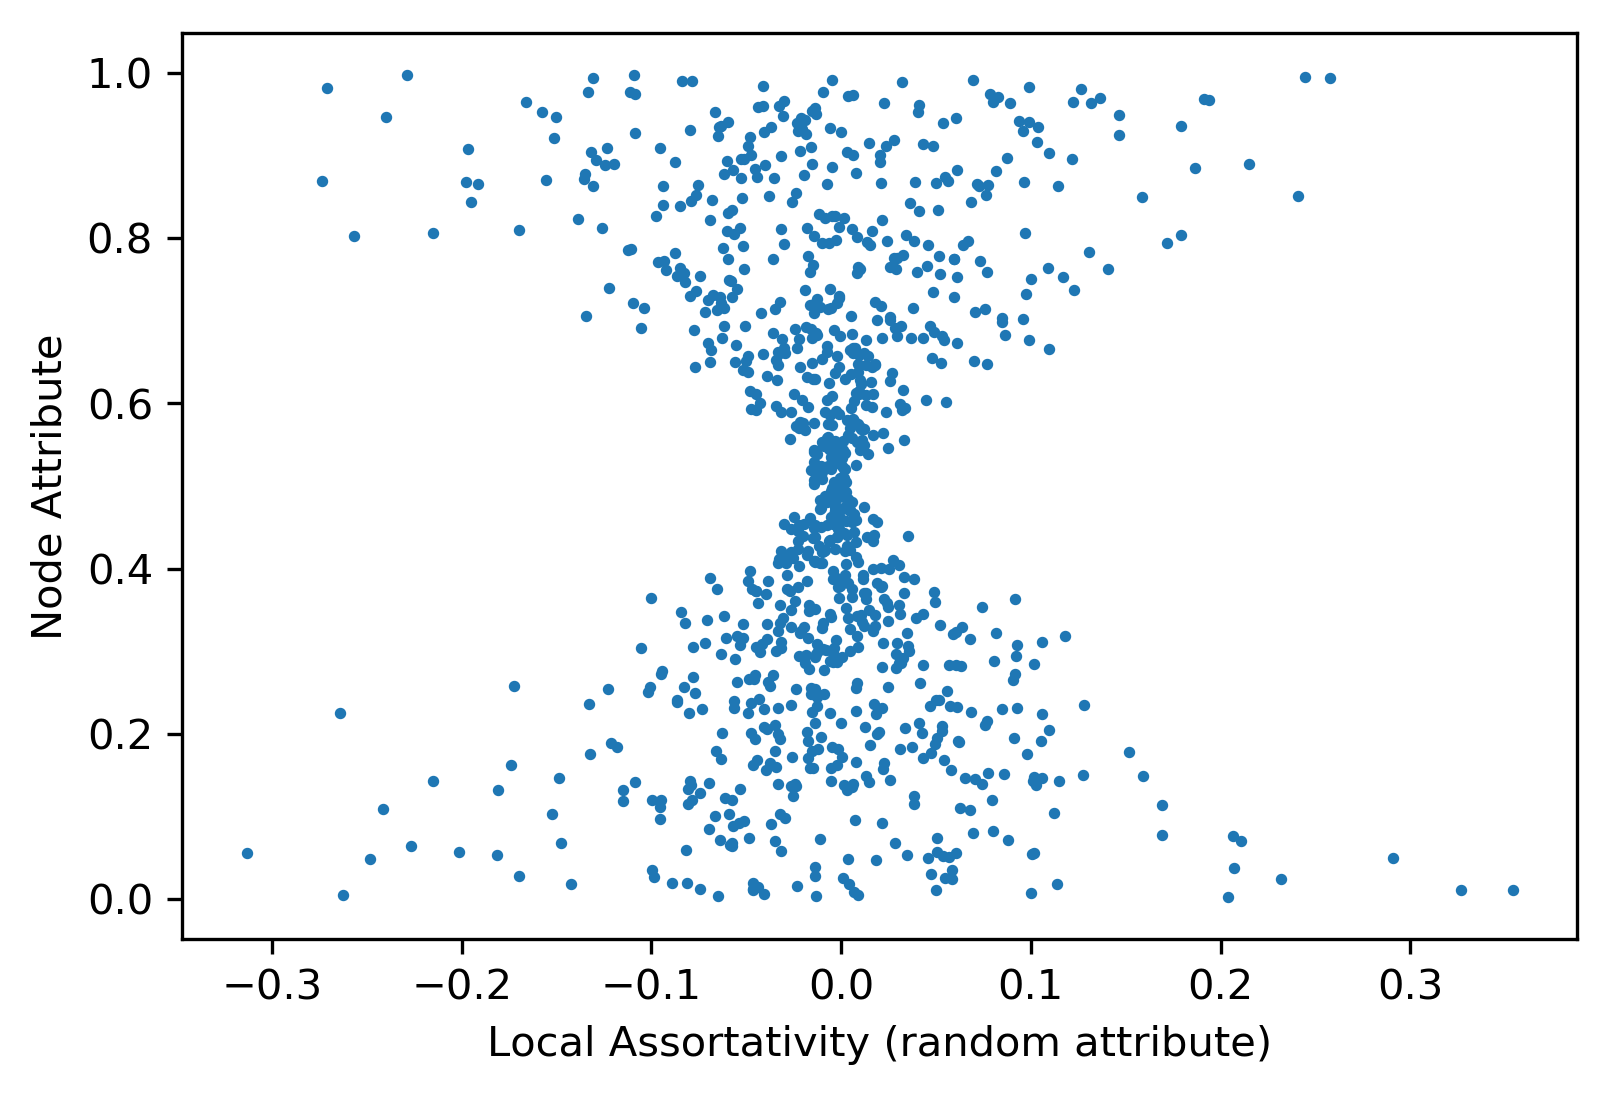

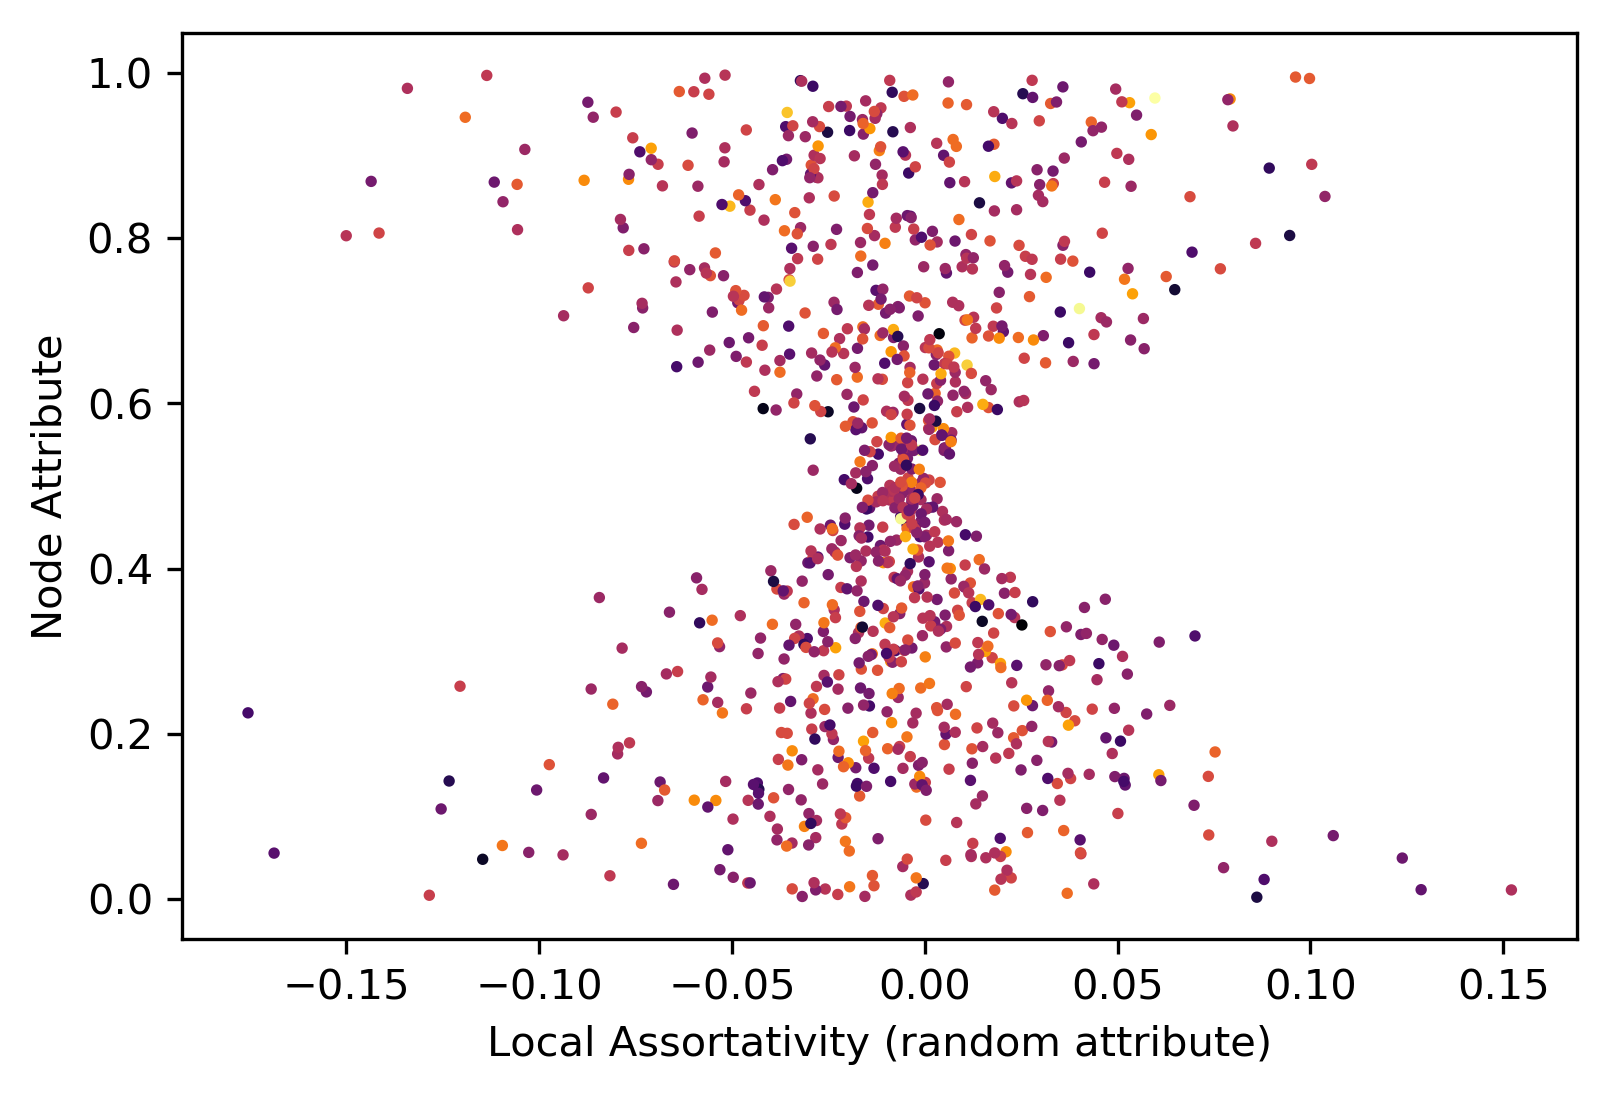

In [37]:
plt.figure(dpi=300)
plt.scatter(la_p, r11_randNb, s=3)
plt.xlabel("Local Assortativity (random attribute)")
plt.ylabel("Node Attribute")

plt.figure(dpi=300)
plt.scatter(la_w, r11_randNb, s=3, c=np.sum(r11_er, axis=0), cmap="inferno")
plt.xlabel("Local Assortativity (random attribute)")
plt.ylabel("Node Attribute")

## FIGURE 2

In [52]:
r11_randNb = np.load("notebook_experiments/data/r11_randNb.npy")
la_extra = np.load("notebook_experiments/results/r11_la_extra_w.npy")
la = np.load("notebook_experiments/results/r11_la_w.npy")

Text(0, 0.5, 'Node Attribute')

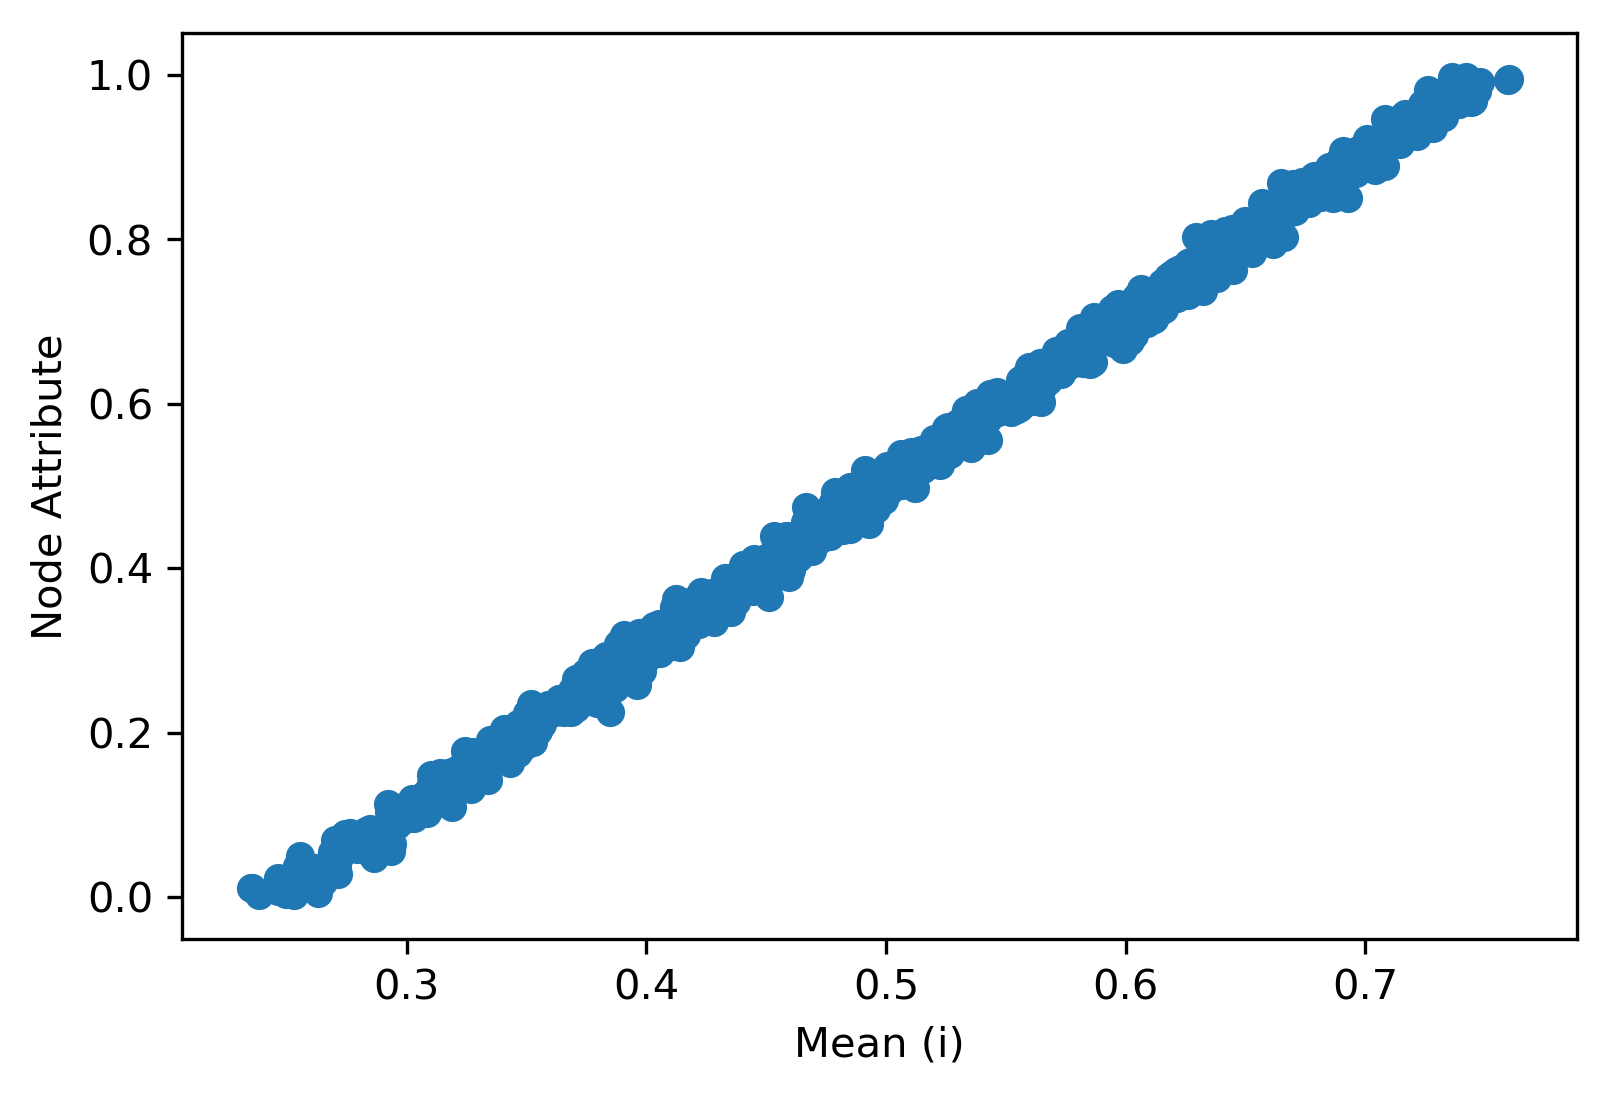

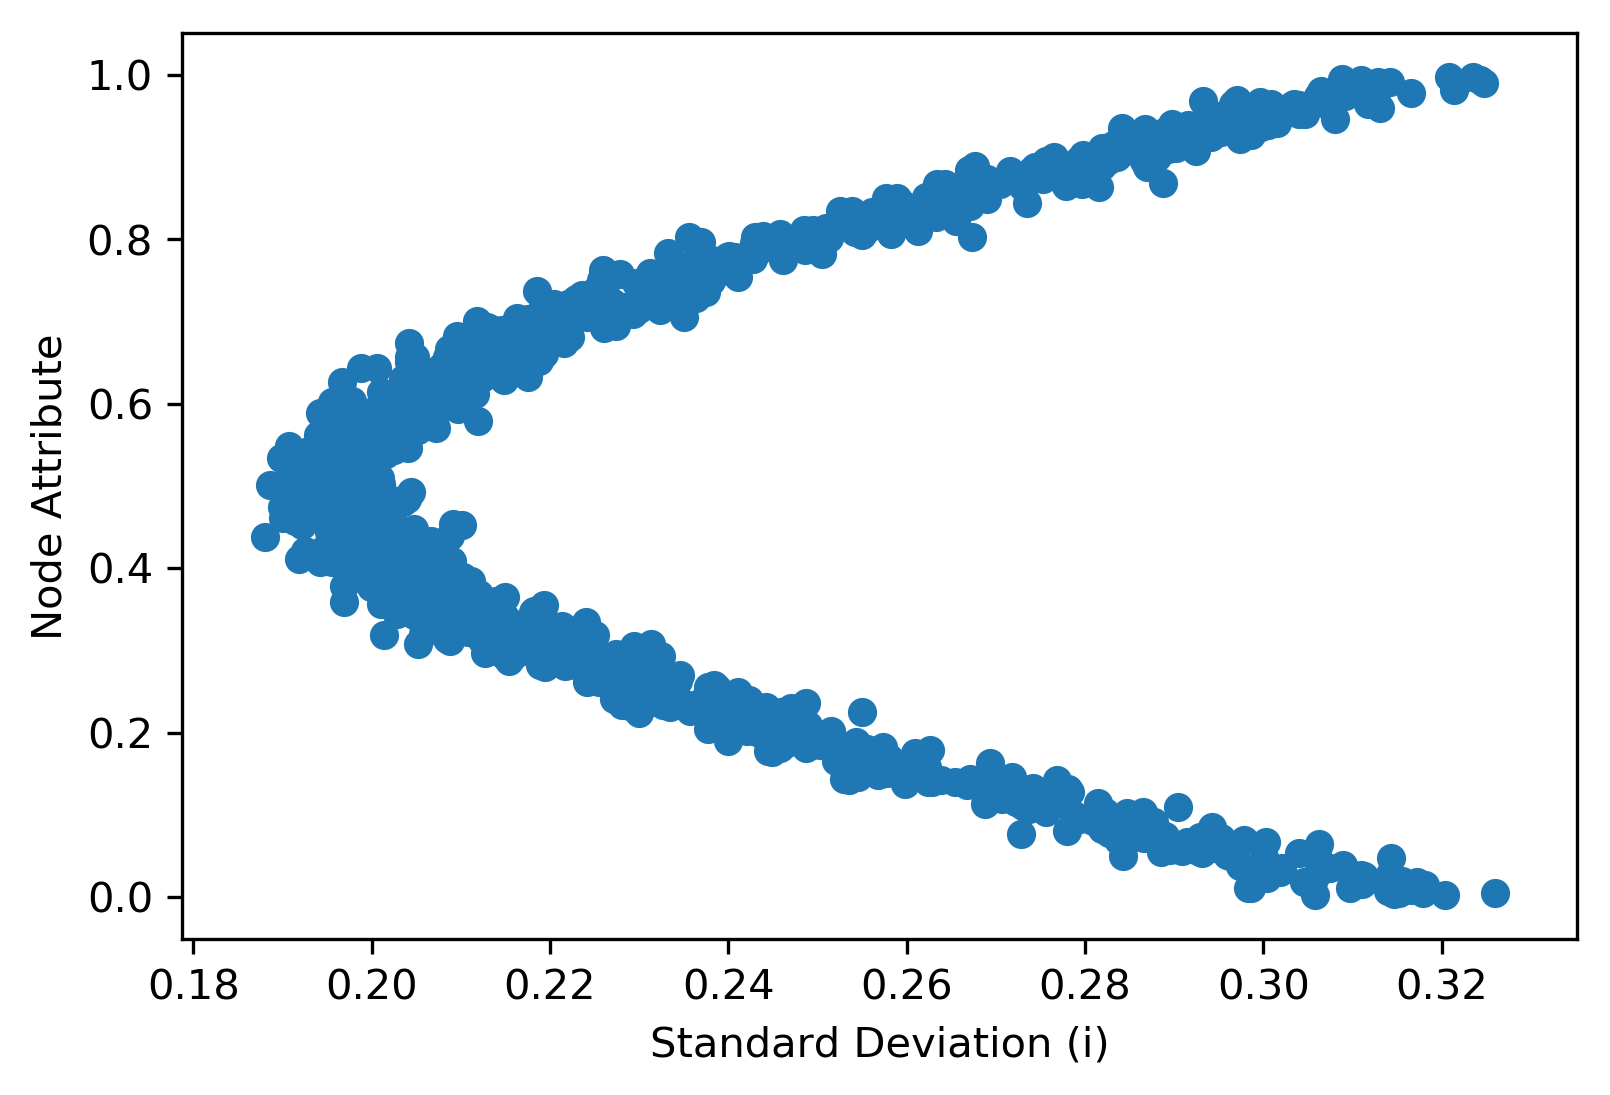

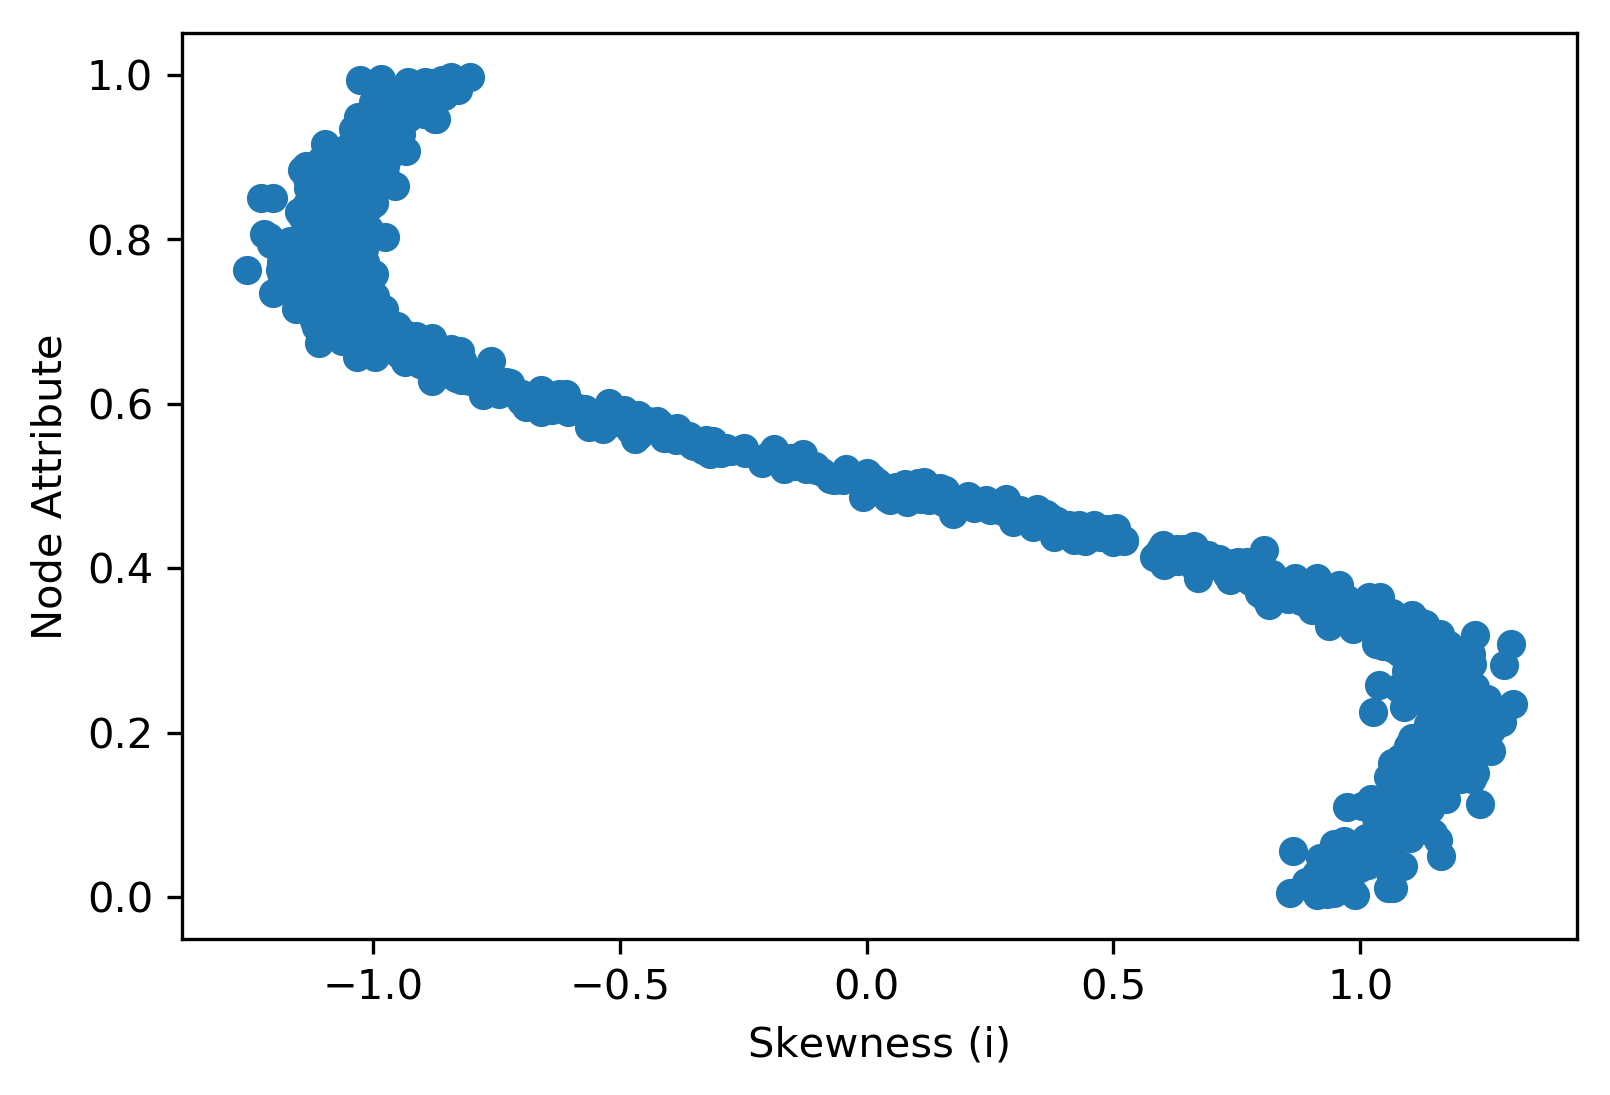

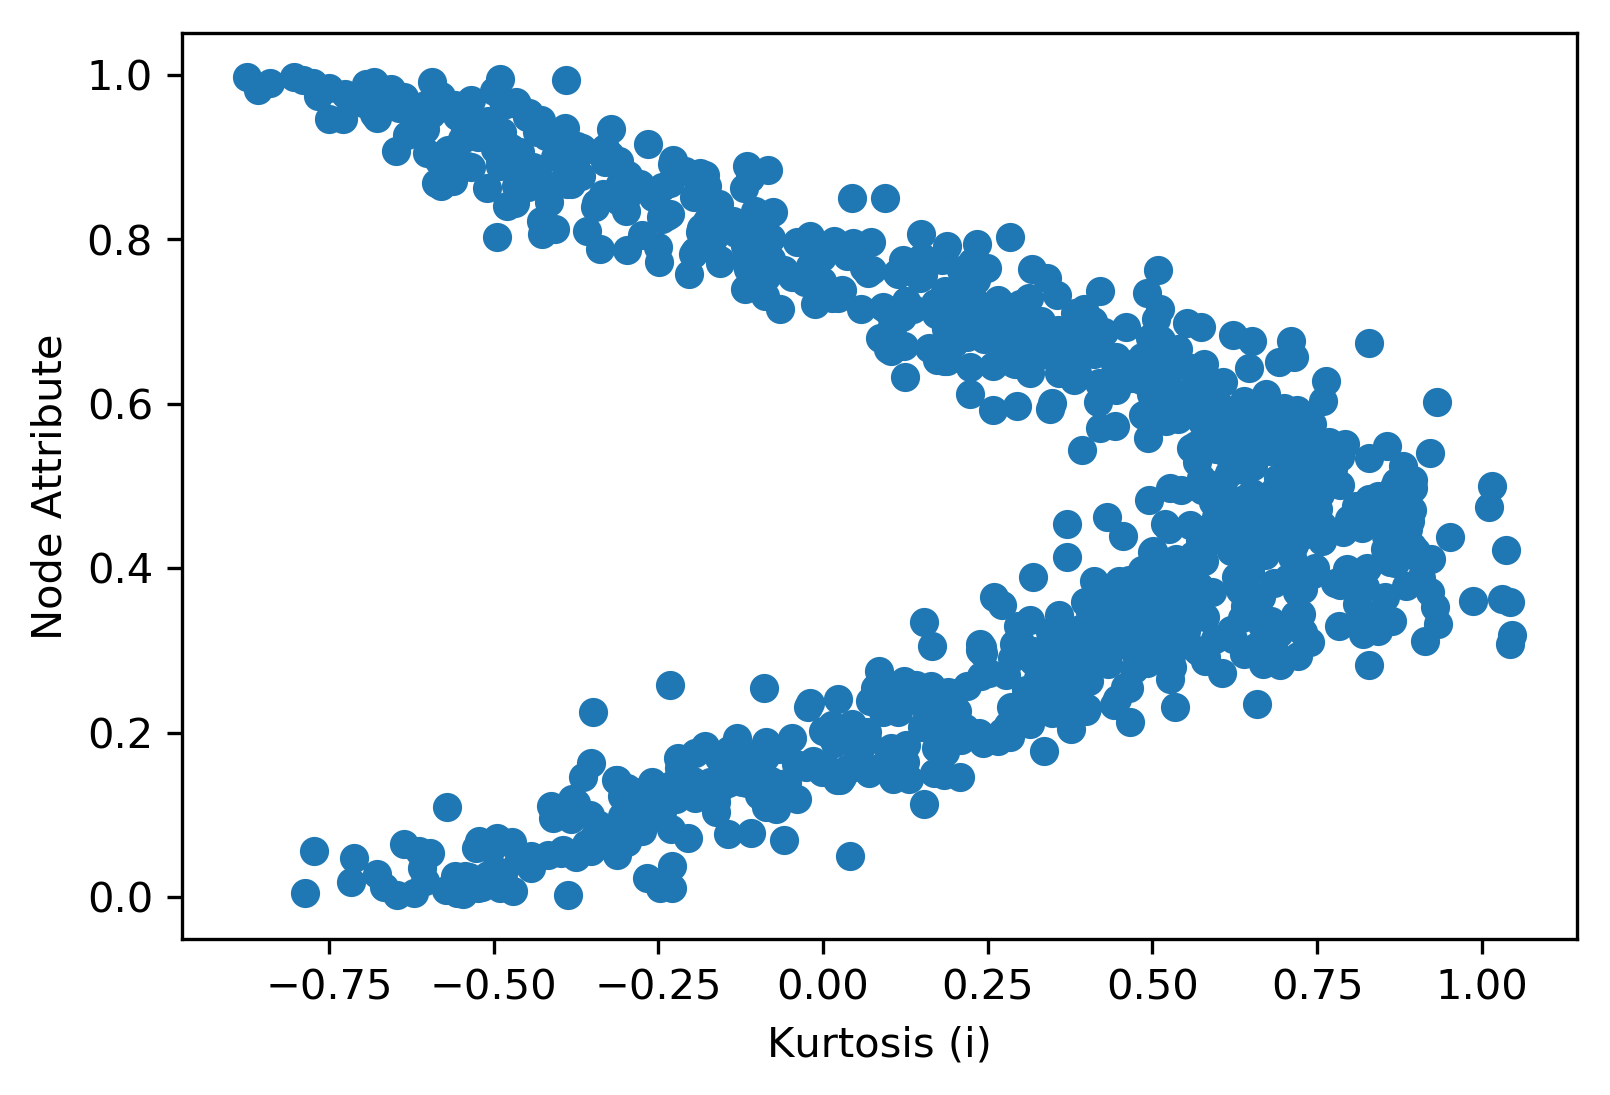

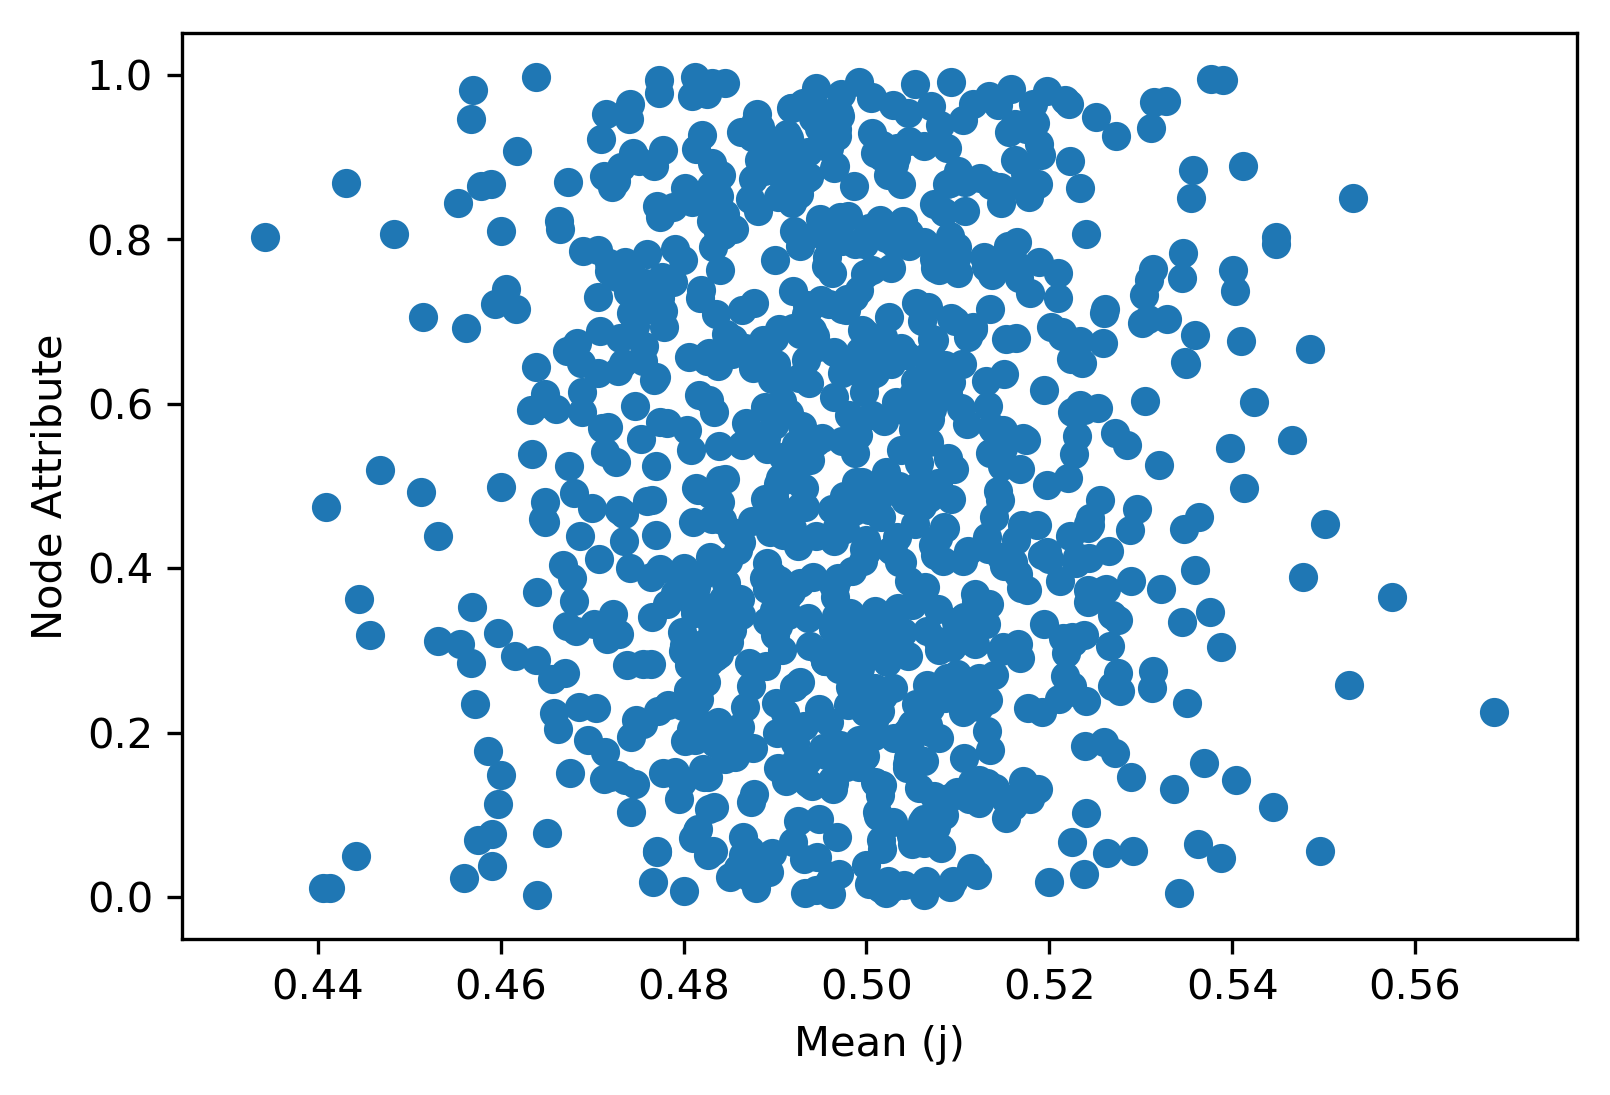

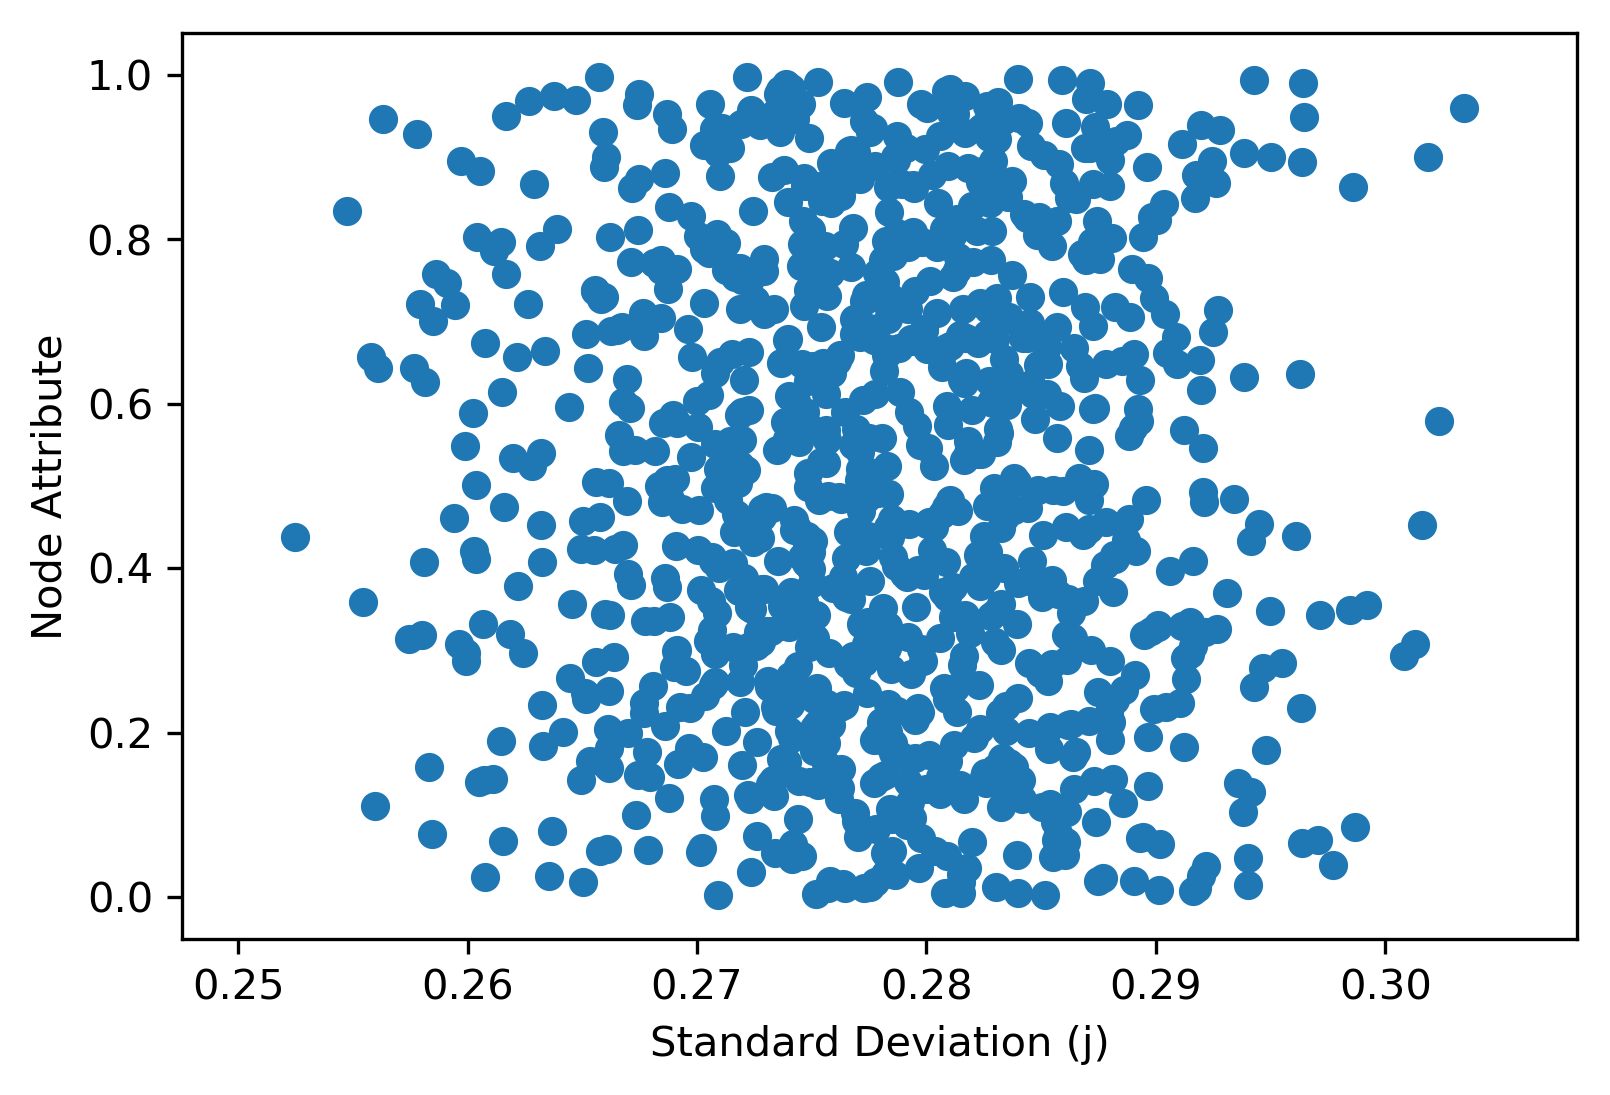

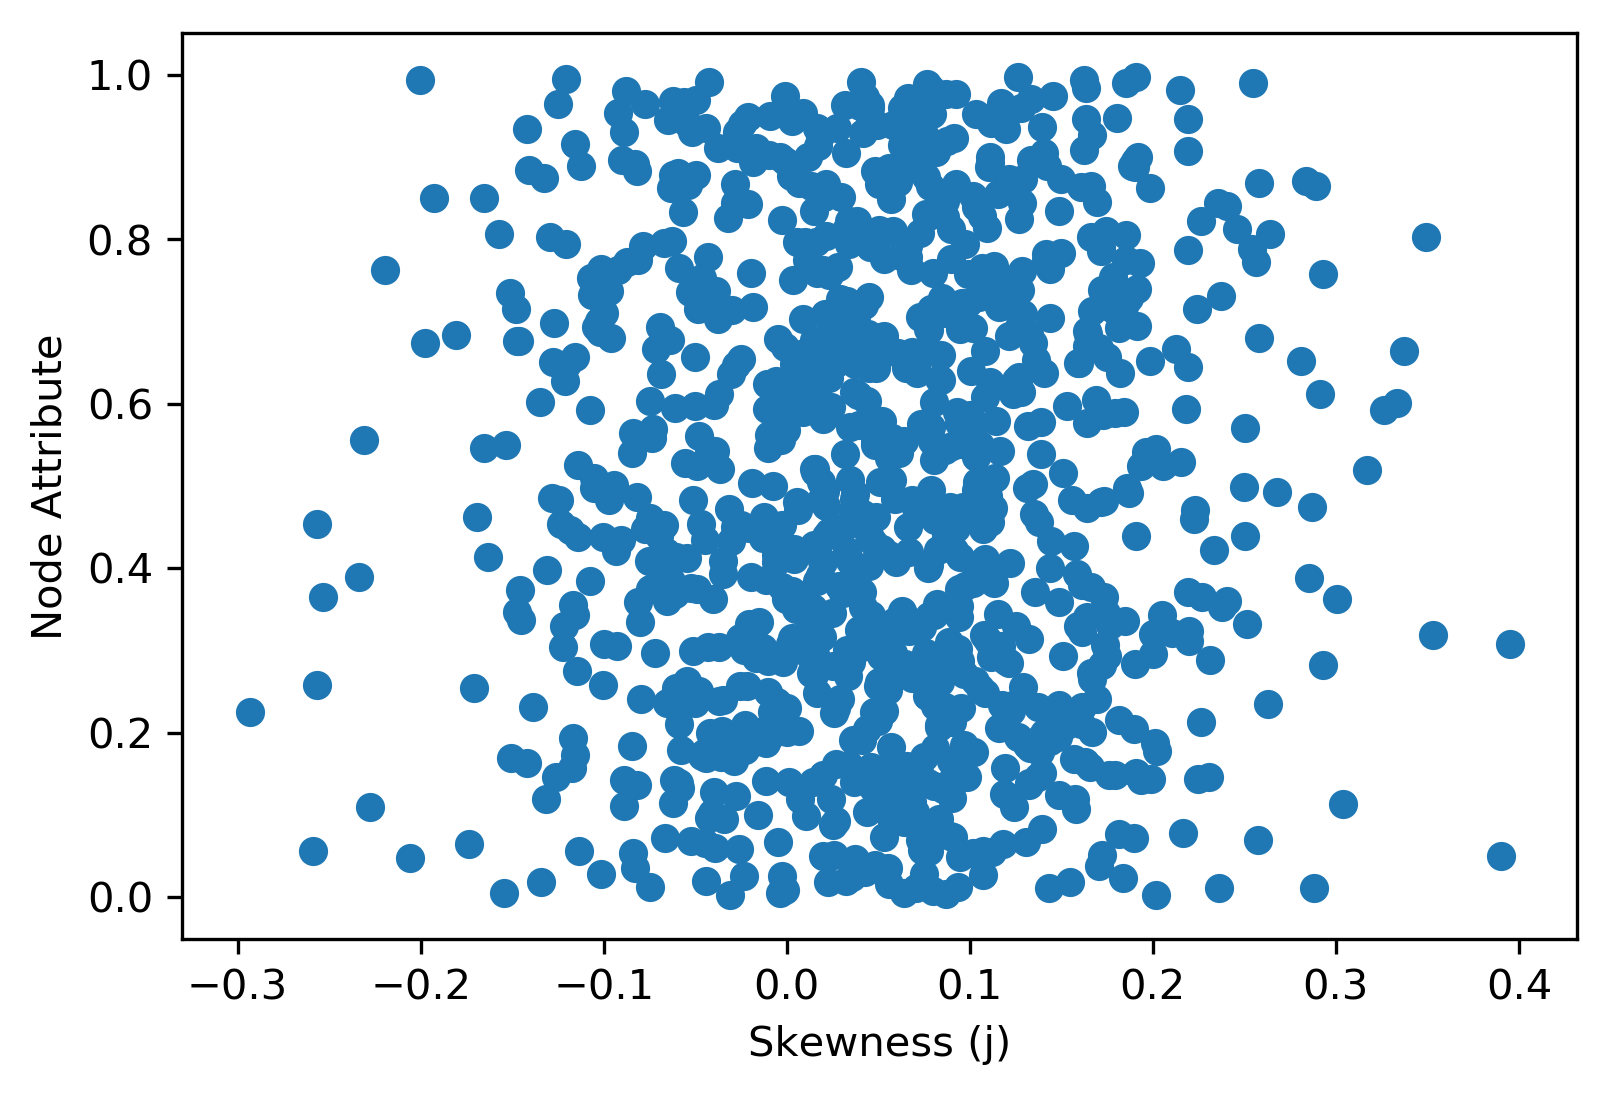

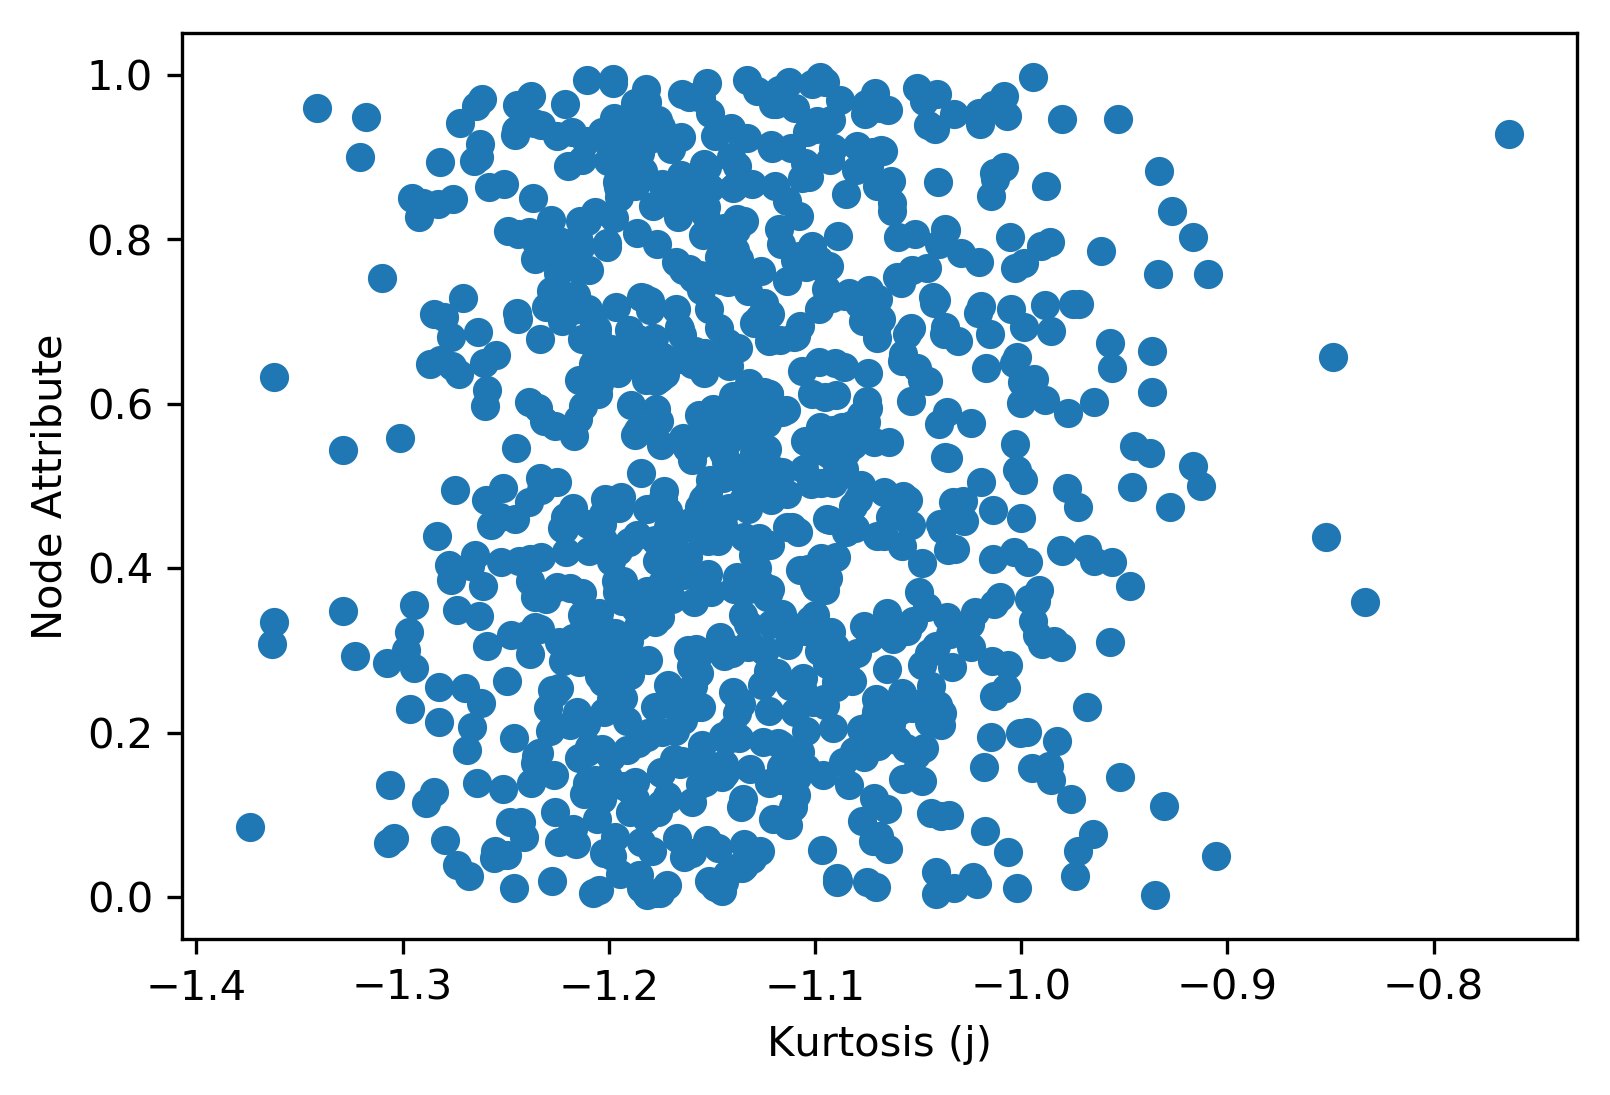

In [53]:
mean = np.zeros((1000))
sd = np.zeros((1000))
skew = np.zeros((1000))
kurt= np.zeros((1000))
y_mean = np.zeros((1000))
y_sd = np.zeros((1000))
y_skew = np.zeros((1000))
y_kurt= np.zeros((1000))
for i in range(1000):
    mean[i] = la_extra[i]["x_mean"]
    sd[i] = la_extra[i]["x_stds"]
    skew[i] = la_extra[i]["x_skew"]
    kurt[i] = la_extra[i]["x_kurt"]
    y_mean[i] = la_extra[i]["y_mean"]
    y_sd[i] = la_extra[i]["y_stds"]
    y_skew[i] = la_extra[i]["y_skew"]
    y_kurt[i] = la_extra[i]["y_kurt"]    
    
plt.figure(dpi=300)
plt.scatter(mean, r11_randNb)
plt.xlabel("Mean (i)")
plt.ylabel("Node Attribute")

plt.figure(dpi=300)
plt.scatter(sd, r11_randNb)
plt.xlabel("Standard Deviation (i)")
plt.ylabel("Node Attribute")

plt.figure(dpi=300)
plt.scatter(skew, r11_randNb)
plt.xlabel("Skewness (i)")
plt.ylabel("Node Attribute")

plt.figure(dpi=300)
plt.scatter(kurt, r11_randNb)
plt.xlabel("Kurtosis (i)")
plt.ylabel("Node Attribute")

plt.figure(dpi=300)
plt.scatter(y_mean, r11_randNb)
plt.xlabel("Mean (j)")
plt.ylabel("Node Attribute")

plt.figure(dpi=300)
plt.scatter(y_sd, r11_randNb)
plt.xlabel("Standard Deviation (j)")
plt.ylabel("Node Attribute")

plt.figure(dpi=300)
plt.scatter(y_skew, r11_randNb)
plt.xlabel("Skewness (j)")
plt.ylabel("Node Attribute")

plt.figure(dpi=300)
plt.scatter(y_kurt, r11_randNb)
plt.xlabel("Kurtosis (j)")
plt.ylabel("Node Attribute")

## FIGURE 3

In [58]:
r12 = np.load("notebook_experiments/results/r12.npy")
r12_la = np.load("notebook_experiments/results/r12_la.npy")
r12_randNb = np.load("notebook_experiments/results/r12_randNb.npy")
r13 = np.load("notebook_experiments/data/r13_erass.npy")
r13_la = np.load("notebook_experiments/results/r13_la.npy")

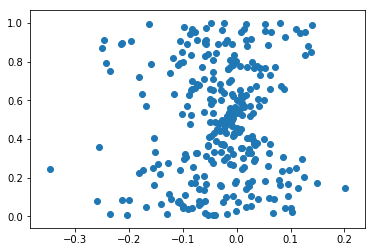

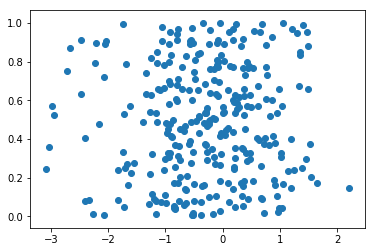

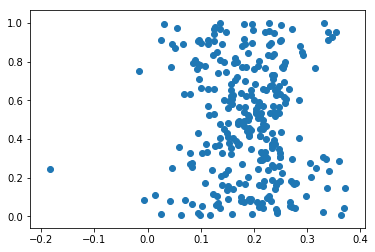

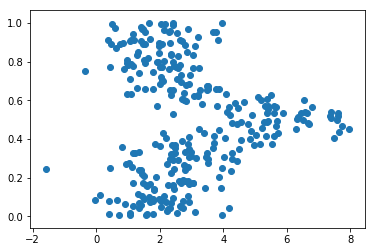

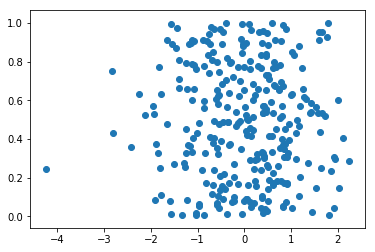

In [59]:
plt.figure()
plt.scatter(r12_la[0], r12_randNb)

plt.figure()
zscored = (r12_la[0] - np.mean(r12_la[1:,:], axis=0))/ np.std(r12_la[1:,:], axis=0)
plt.scatter(zscored, r12_randNb)

plt.figure()
plt.scatter(r13_la[0], r12_randNb)

plt.figure()
zscored = (r13_la[0] - np.mean(r12_la[1:,:], axis=0))/ np.std(r12_la[1:,:], axis=0)
plt.scatter(zscored, r12_randNb)

plt.figure()
zscored = (r13_la[0] - np.mean(r13_la[1:,:], axis=0))/ np.std(r13_la[1:,:], axis=0)
plt.scatter(zscored, r12_randNb)

## EXTRA

In [7]:
r5_er = np.load("notebook_experiments/data/r5_er.npy")
r5_logspace = np.load("notebook_experiments/data/r5_logspace.npy")
r5_randNb = np.load("notebook_experiments/data/r5_randNb.npy")
r6_la_rand_er_peel = np.load("notebook_experiments/results/r6_la_rand_er_peel.npy")
r6_la_rand_er_w = np.load("notebook_experiments/results/r6_la_rand_er_w.npy")
r6_la_rand_er_w_t = np.load("notebook_experiments/results/r6_la_rand_er_w_t.npy")
r6_la_rand_er_w_extra = np.load("notebook_experiments/results/r6_la_rand_er_w_extra.npy")

Text(0, 0.5, 'Random Attribute Value')

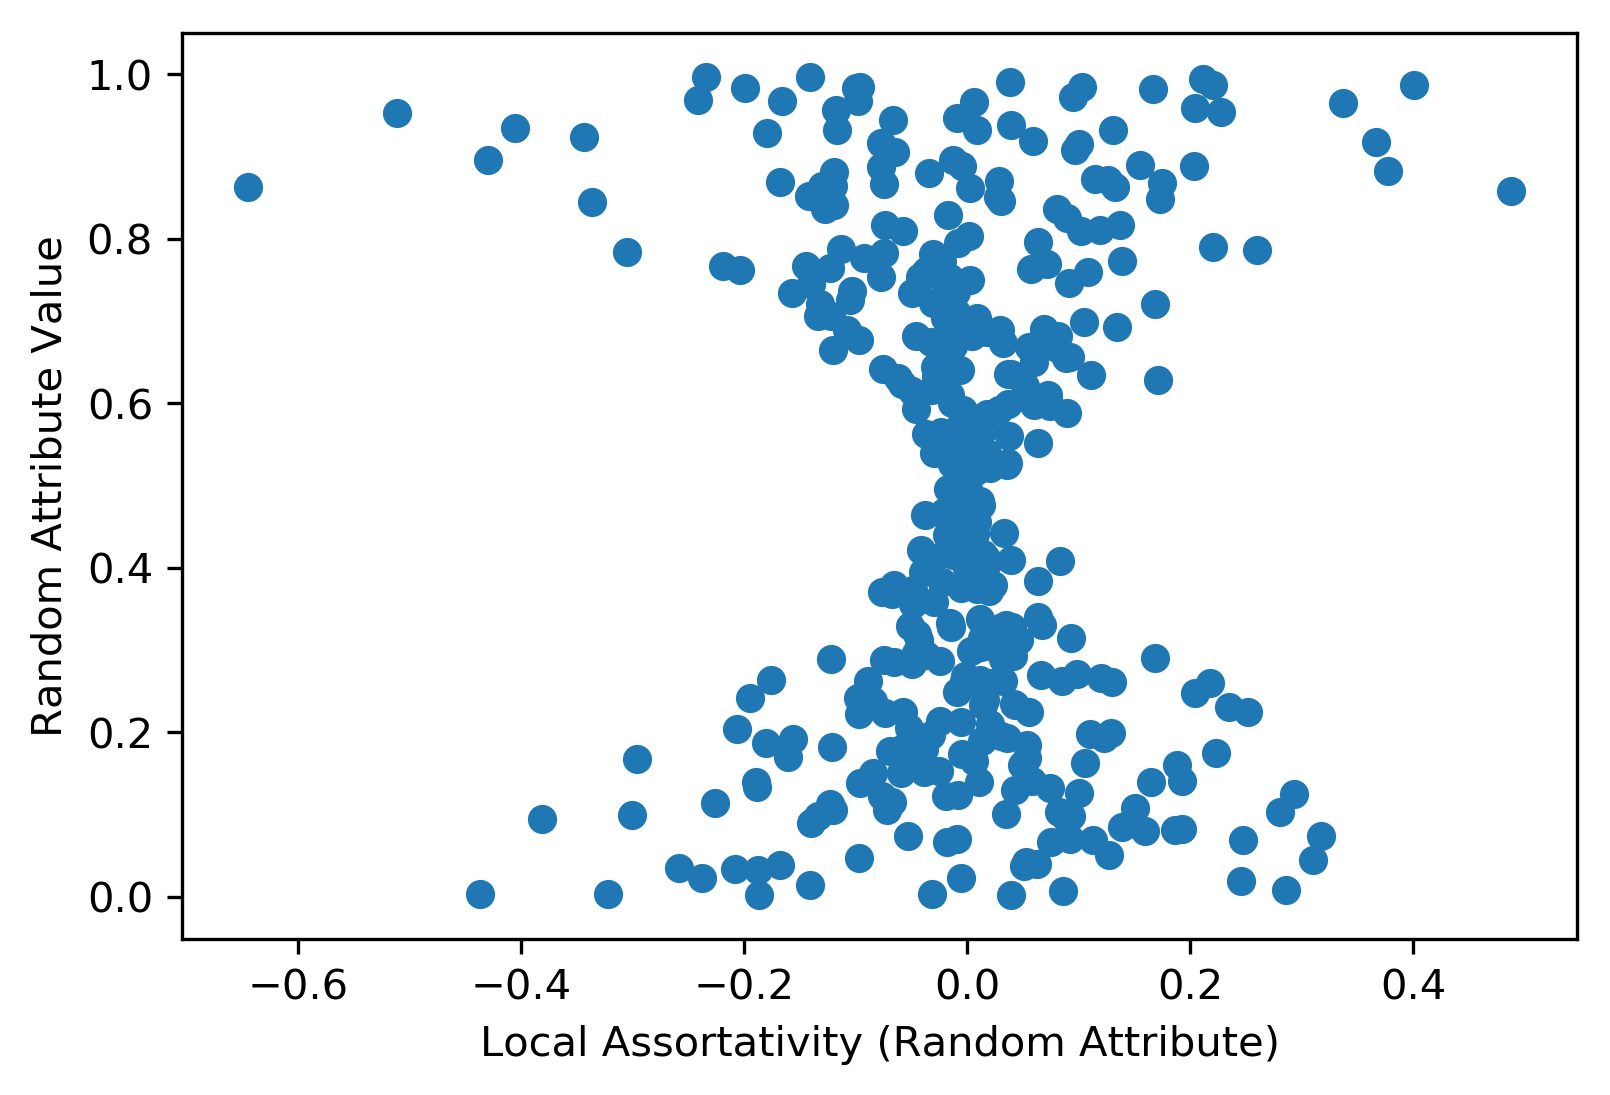

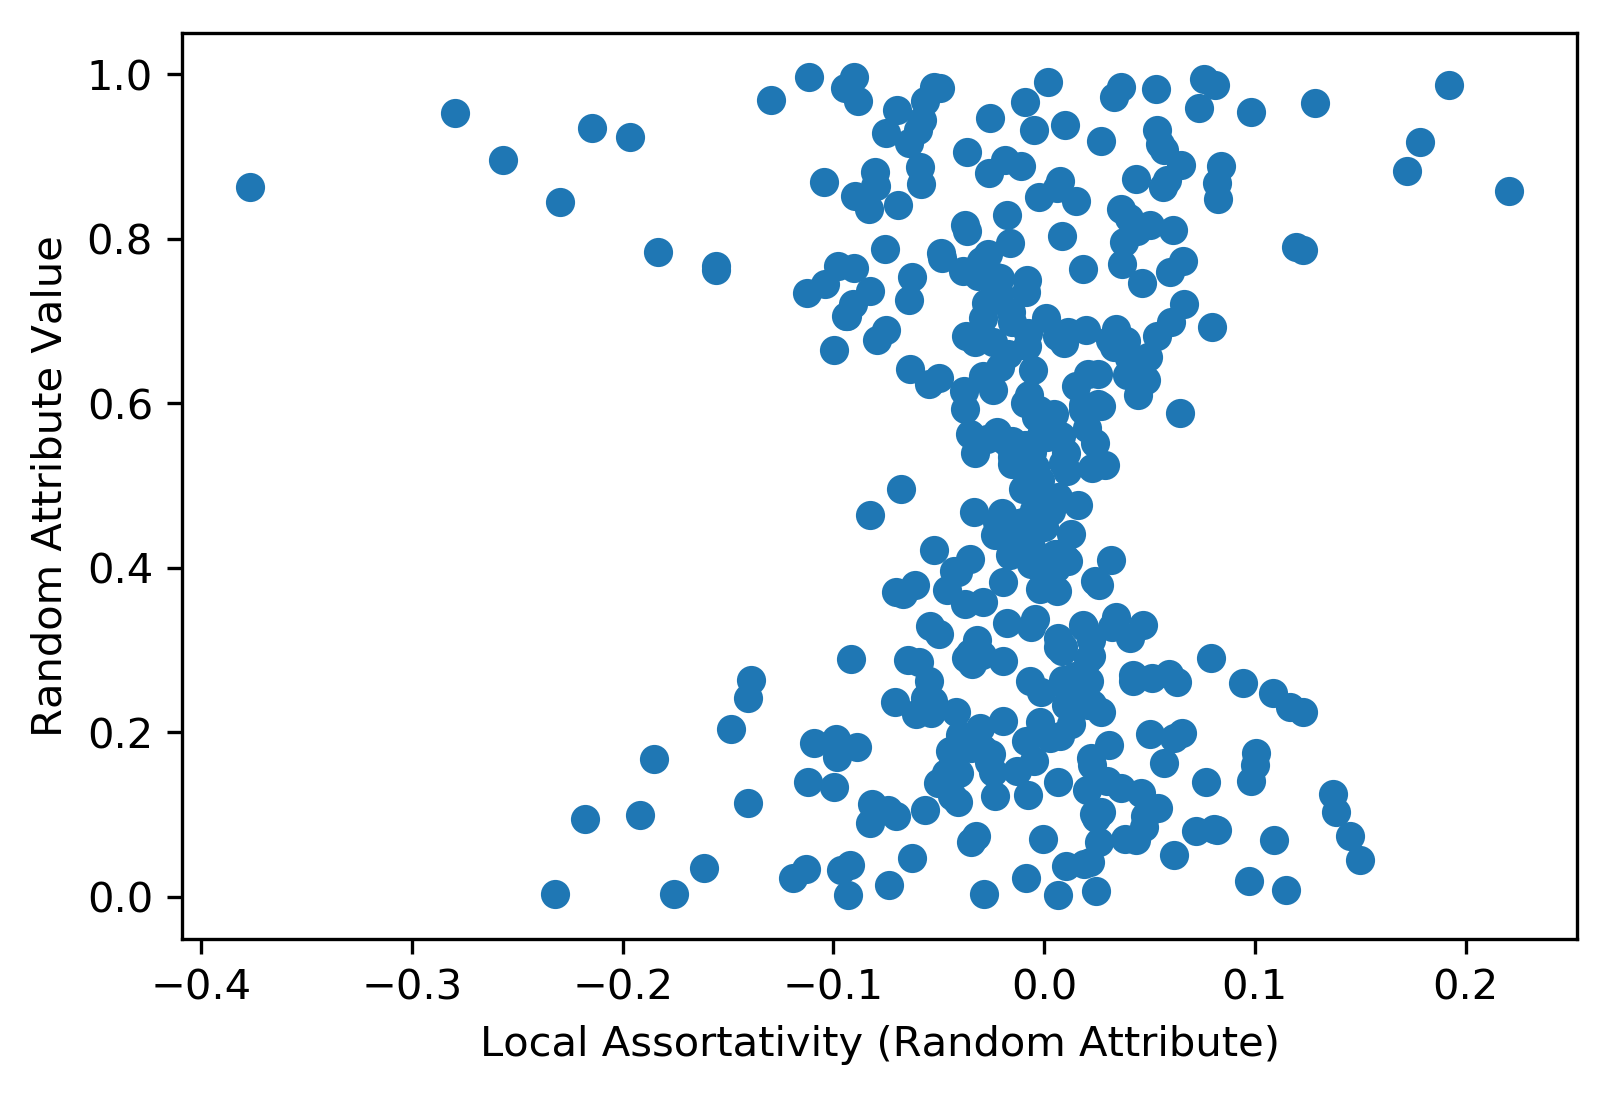

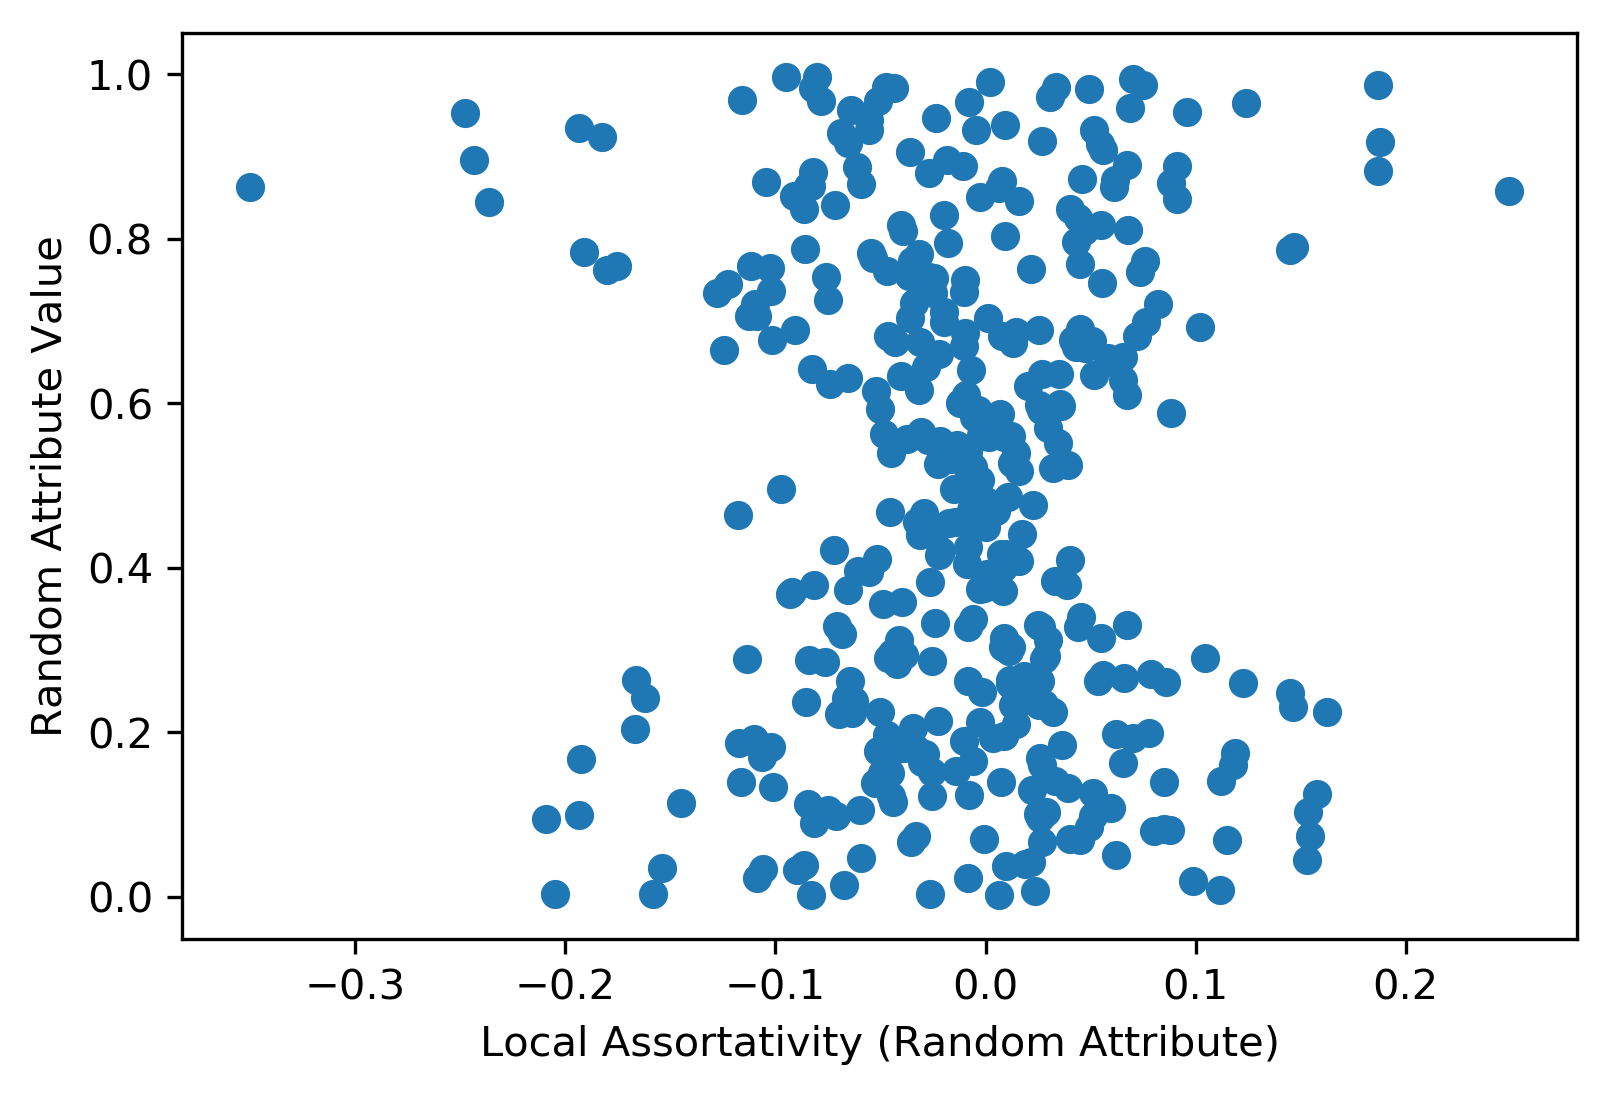

In [3]:
plt.figure(dpi=300)
plt.scatter(r6_la_rand_er_peel[49,:], r5_randNb)
plt.xlabel("Local Assortativity (Random Attribute)")
plt.ylabel("Random Attribute Value")

plt.figure(dpi=300)
plt.scatter(r6_la_rand_er_w[49,:], r5_randNb)
plt.xlabel("Local Assortativity (Random Attribute)")
plt.ylabel("Random Attribute Value")

plt.figure(dpi=300)
plt.scatter(r6_la_rand_er_w_t[49,:], r5_randNb)
plt.xlabel("Local Assortativity (Random Attribute)")
plt.ylabel("Random Attribute Value")

Text(0, 0.5, 'Random Attribute Value')

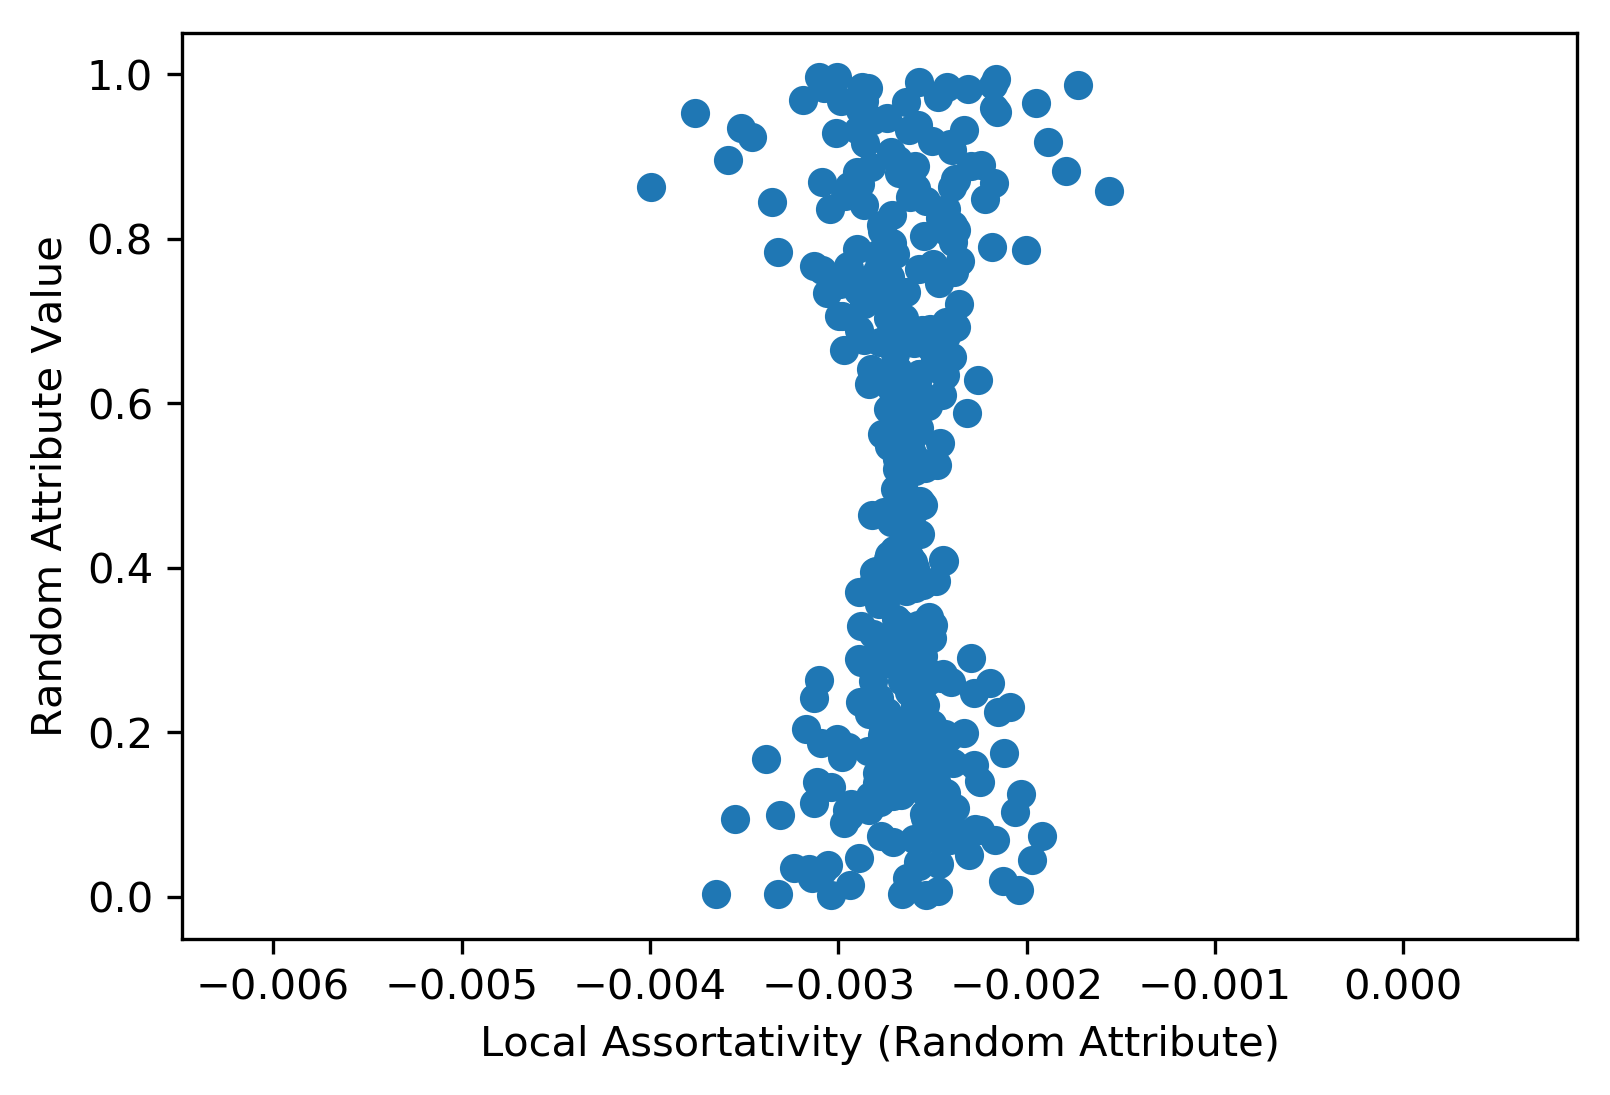

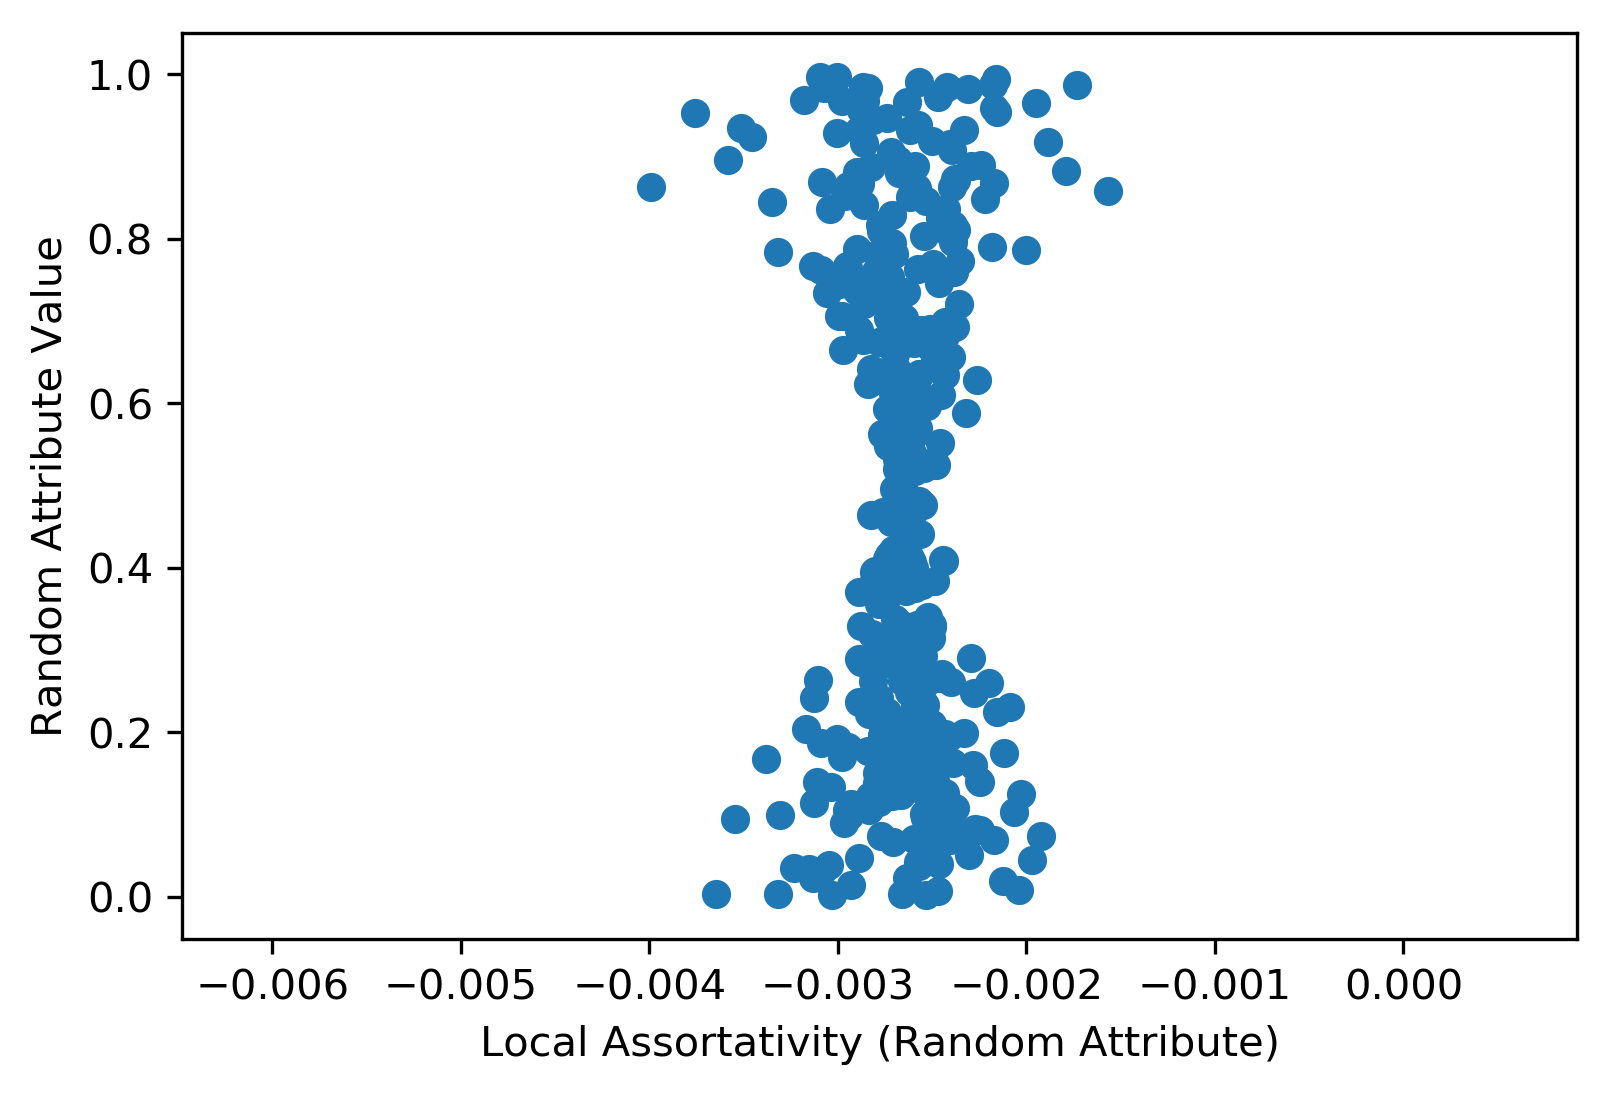

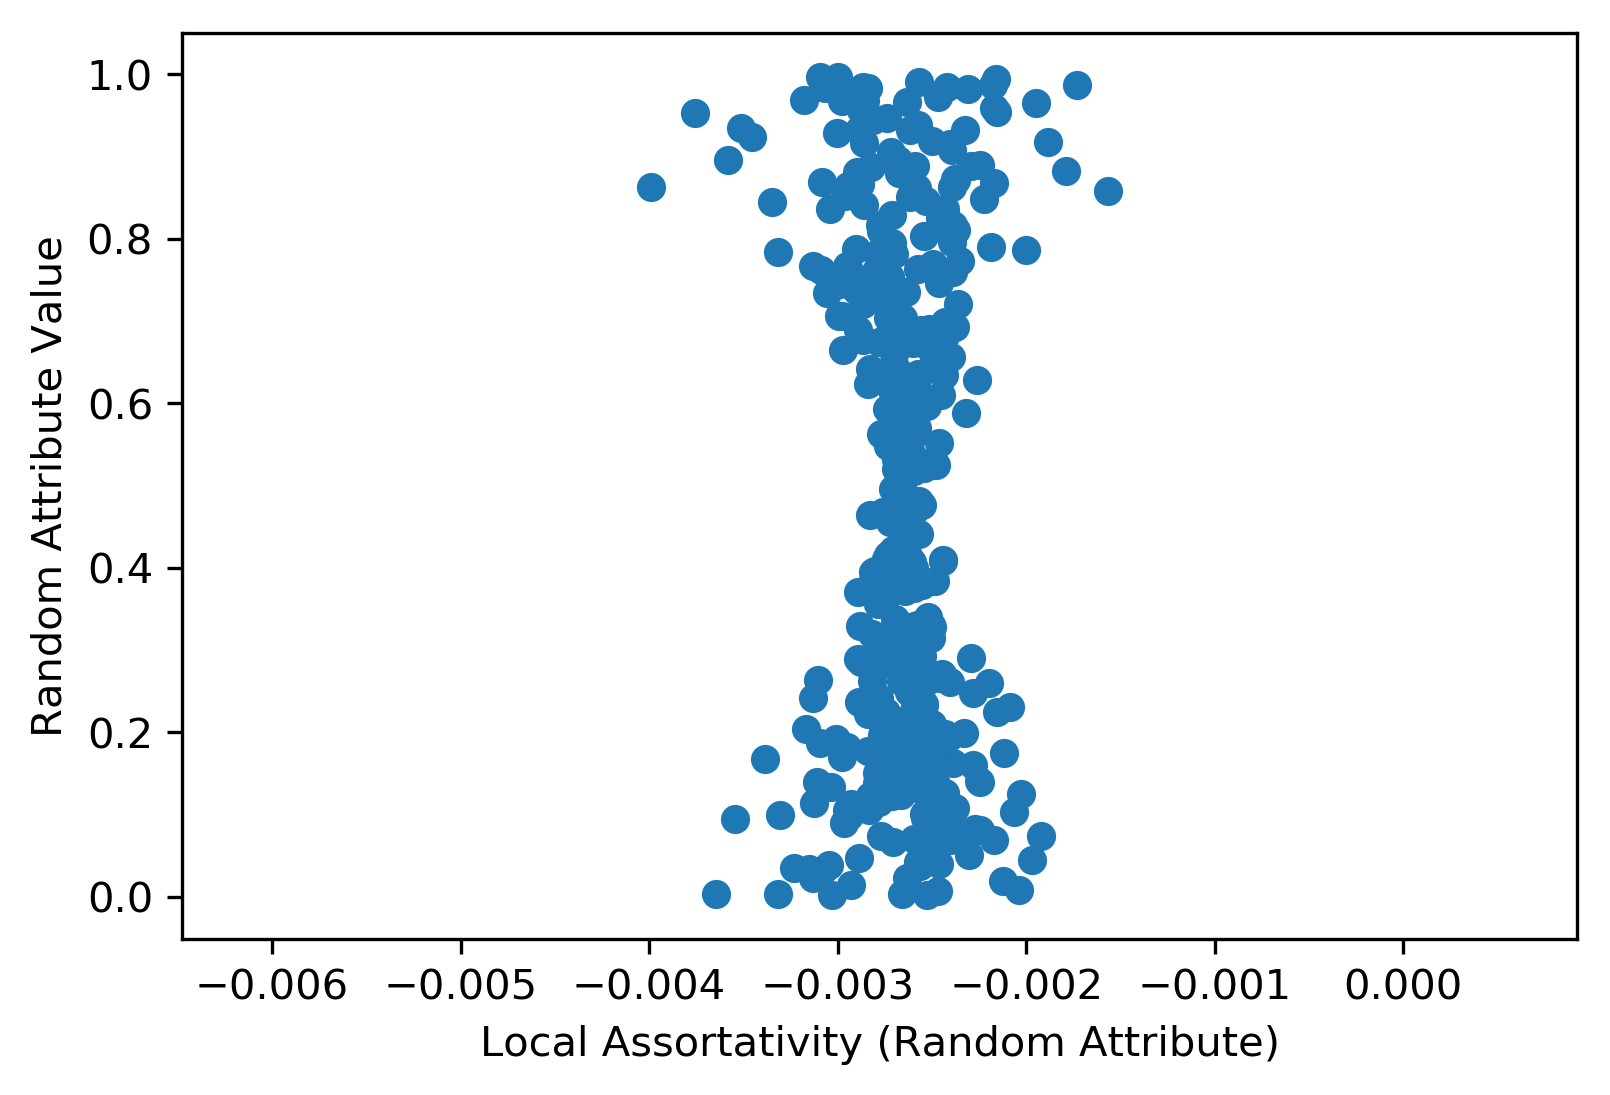

In [6]:
plt.figure(dpi=300)
plt.scatter(r6_la_rand_er_peel[0,:], r5_randNb)
plt.xlabel("Local Assortativity (Random Attribute)")
plt.ylabel("Random Attribute Value")

plt.figure(dpi=300)
plt.scatter(r6_la_rand_er_w[0,:], r5_randNb)
plt.xlabel("Local Assortativity (Random Attribute)")
plt.ylabel("Random Attribute Value")

plt.figure(dpi=300)
plt.scatter(r6_la_rand_er_w_t[0,:], r5_randNb)
plt.xlabel("Local Assortativity (Random Attribute)")
plt.ylabel("Random Attribute Value")

In [12]:
r6_la_rand_er_w.shape

(50, 400)

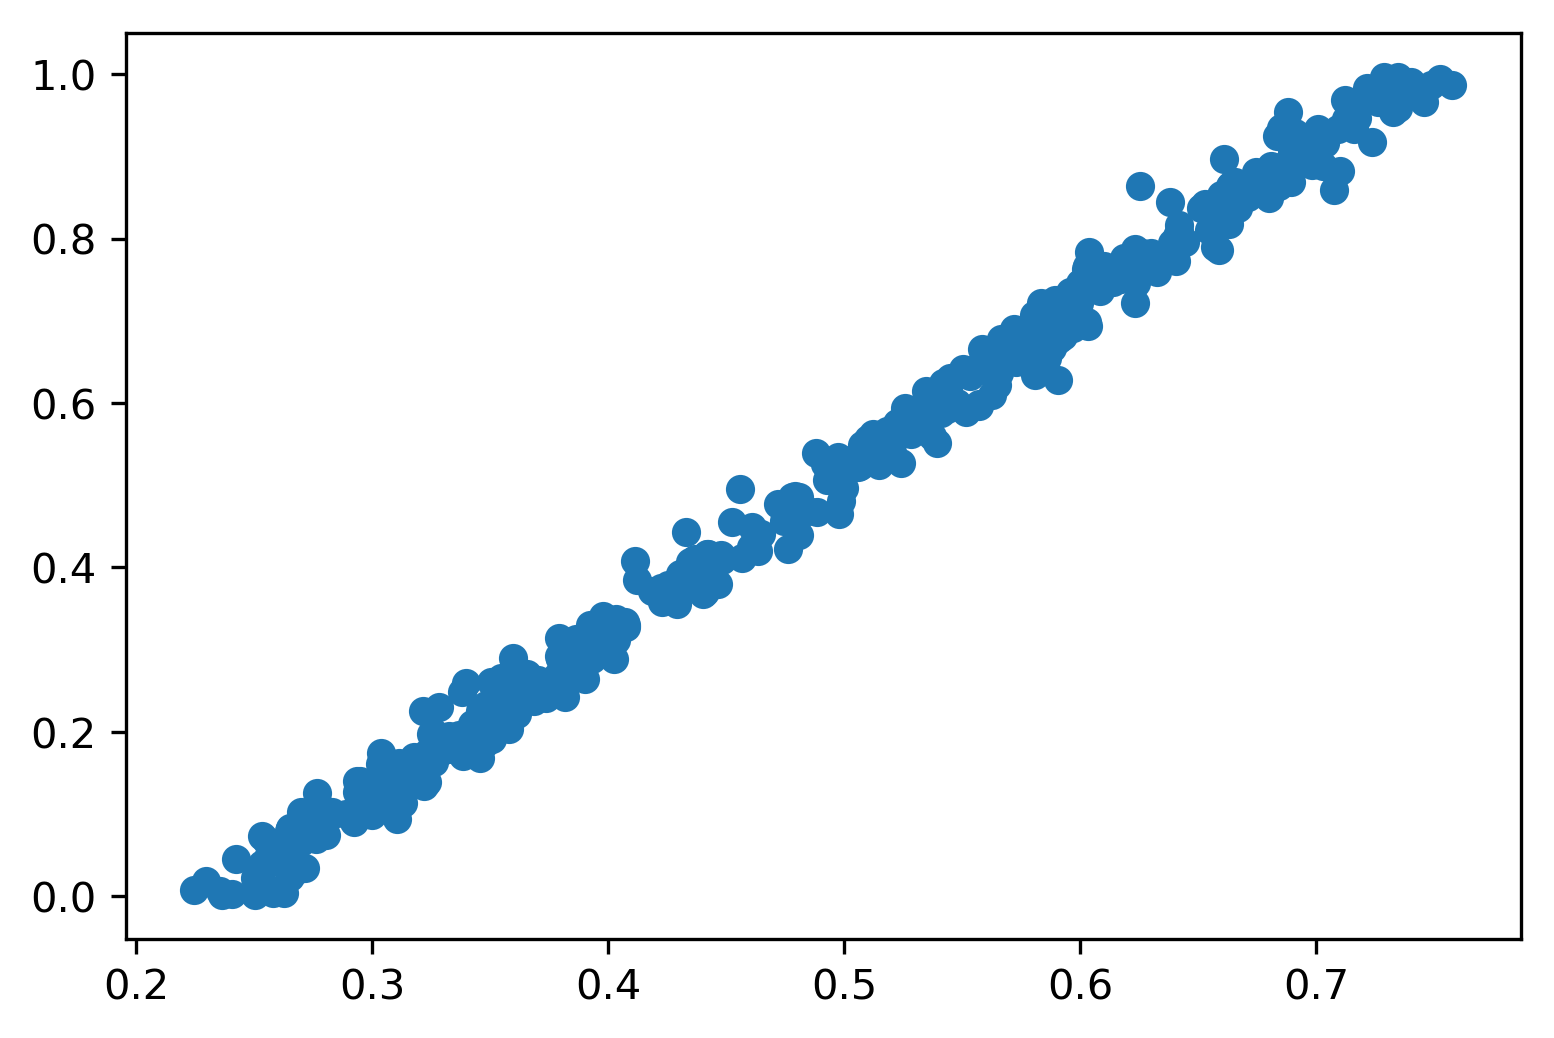

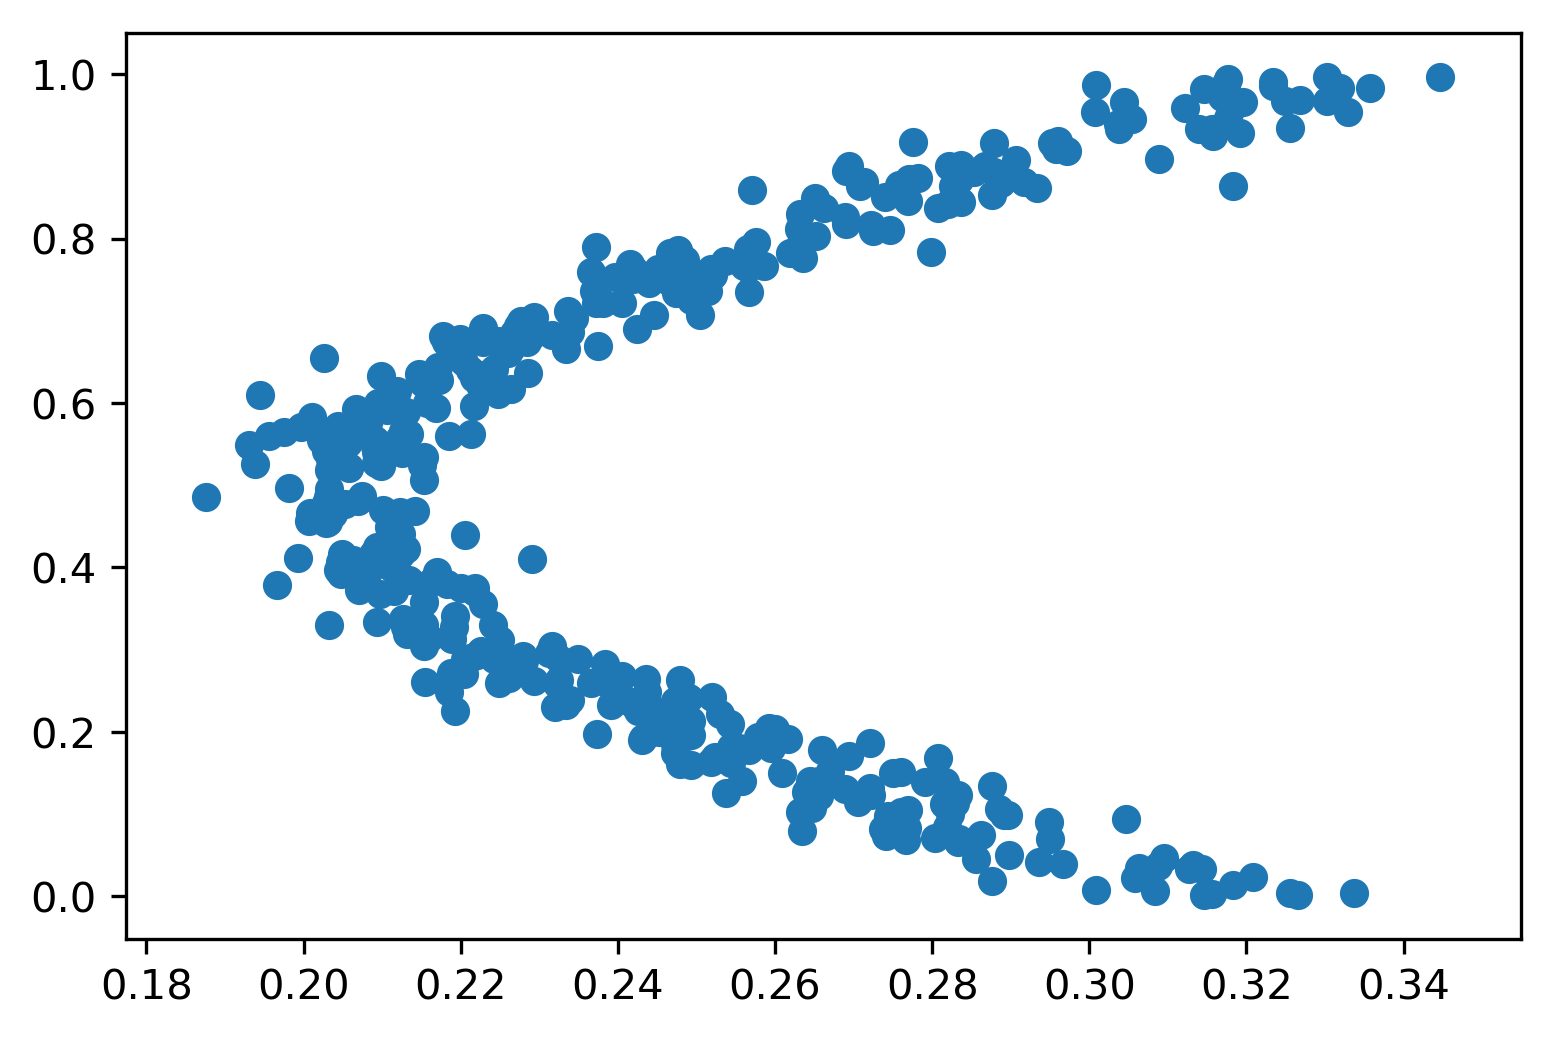

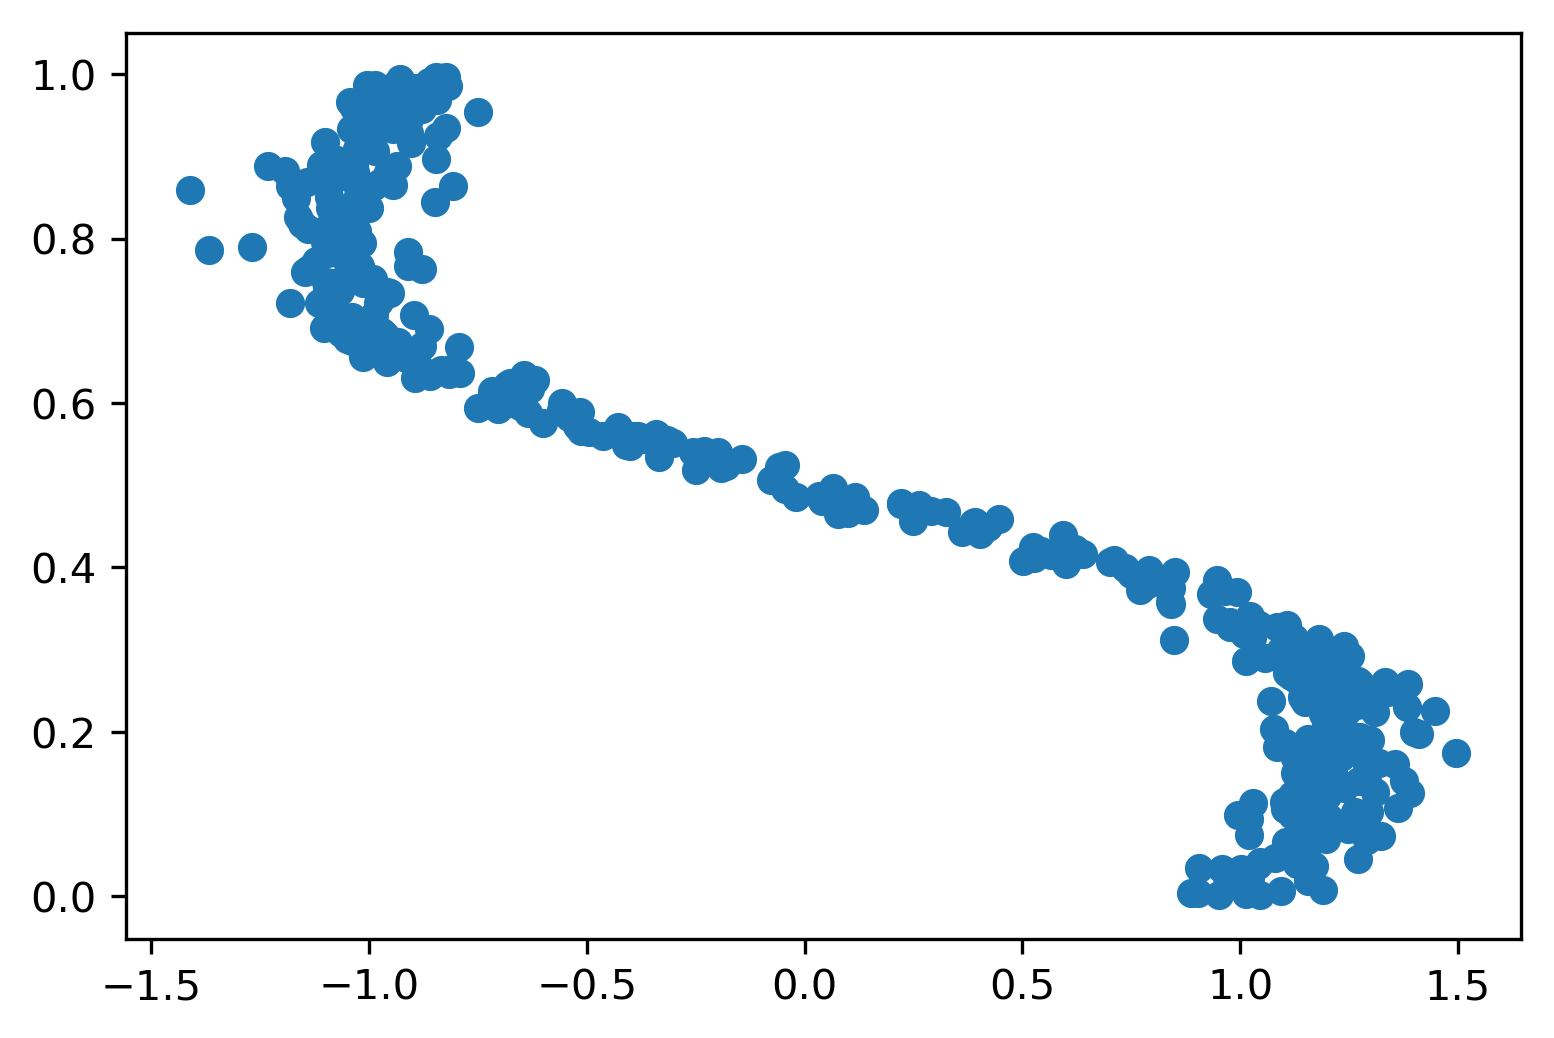

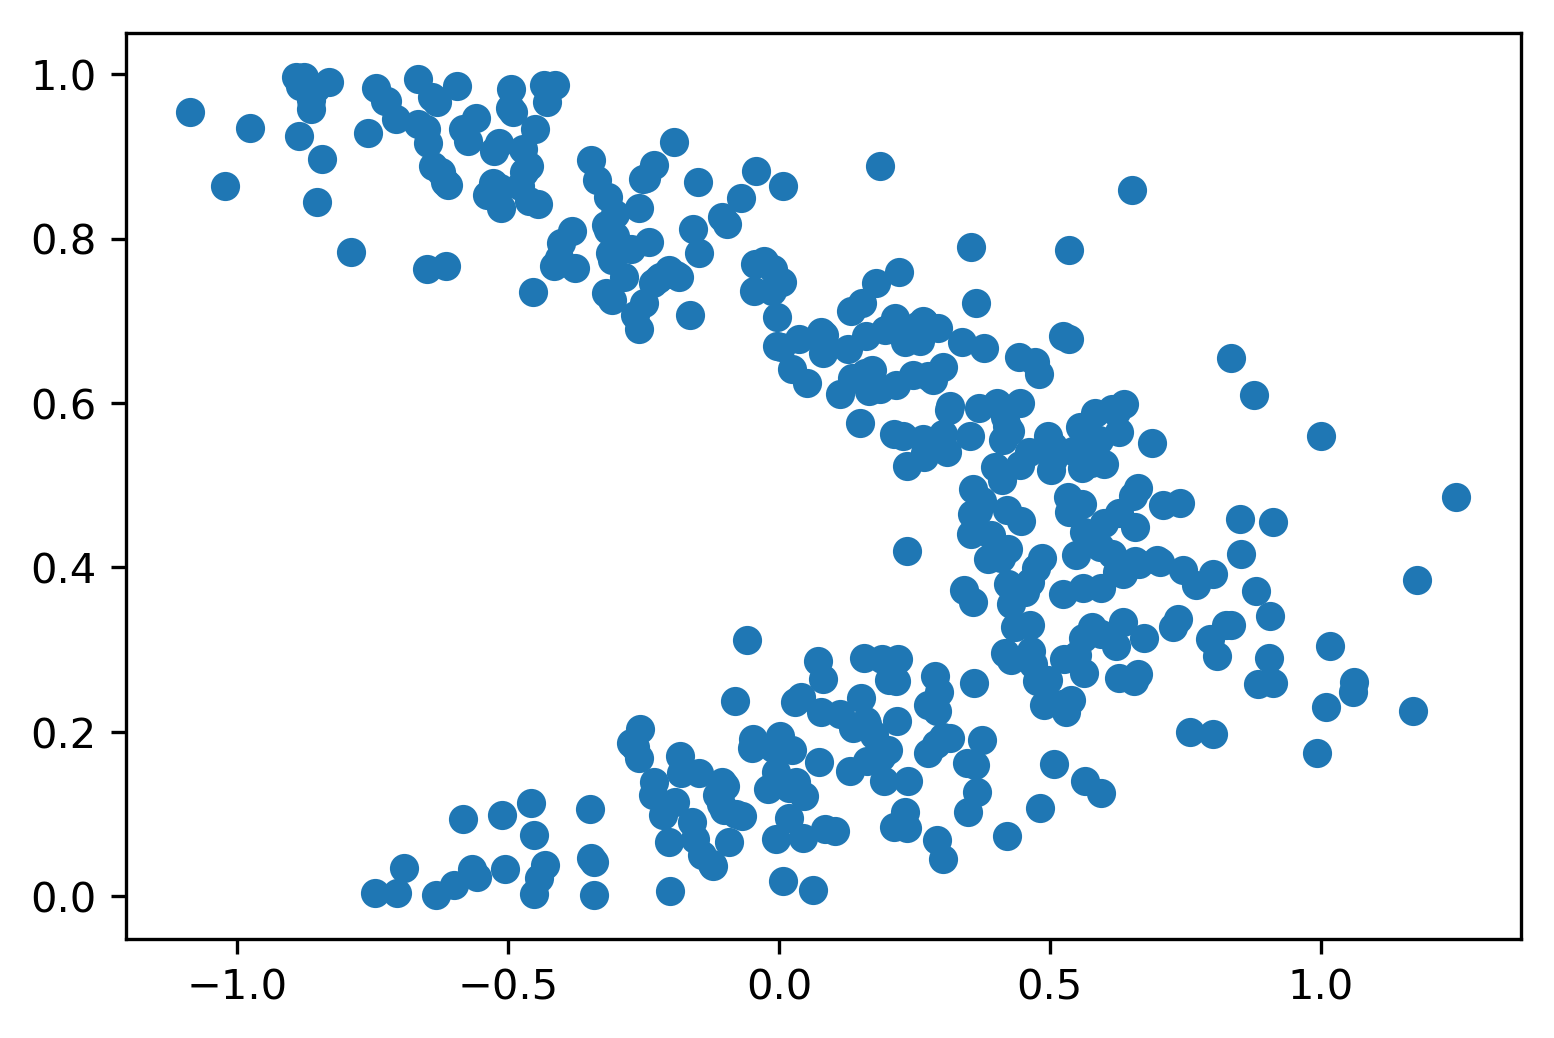

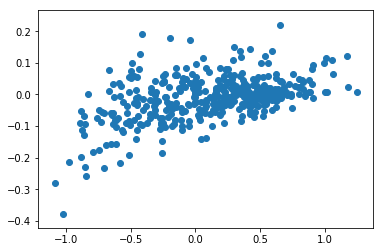

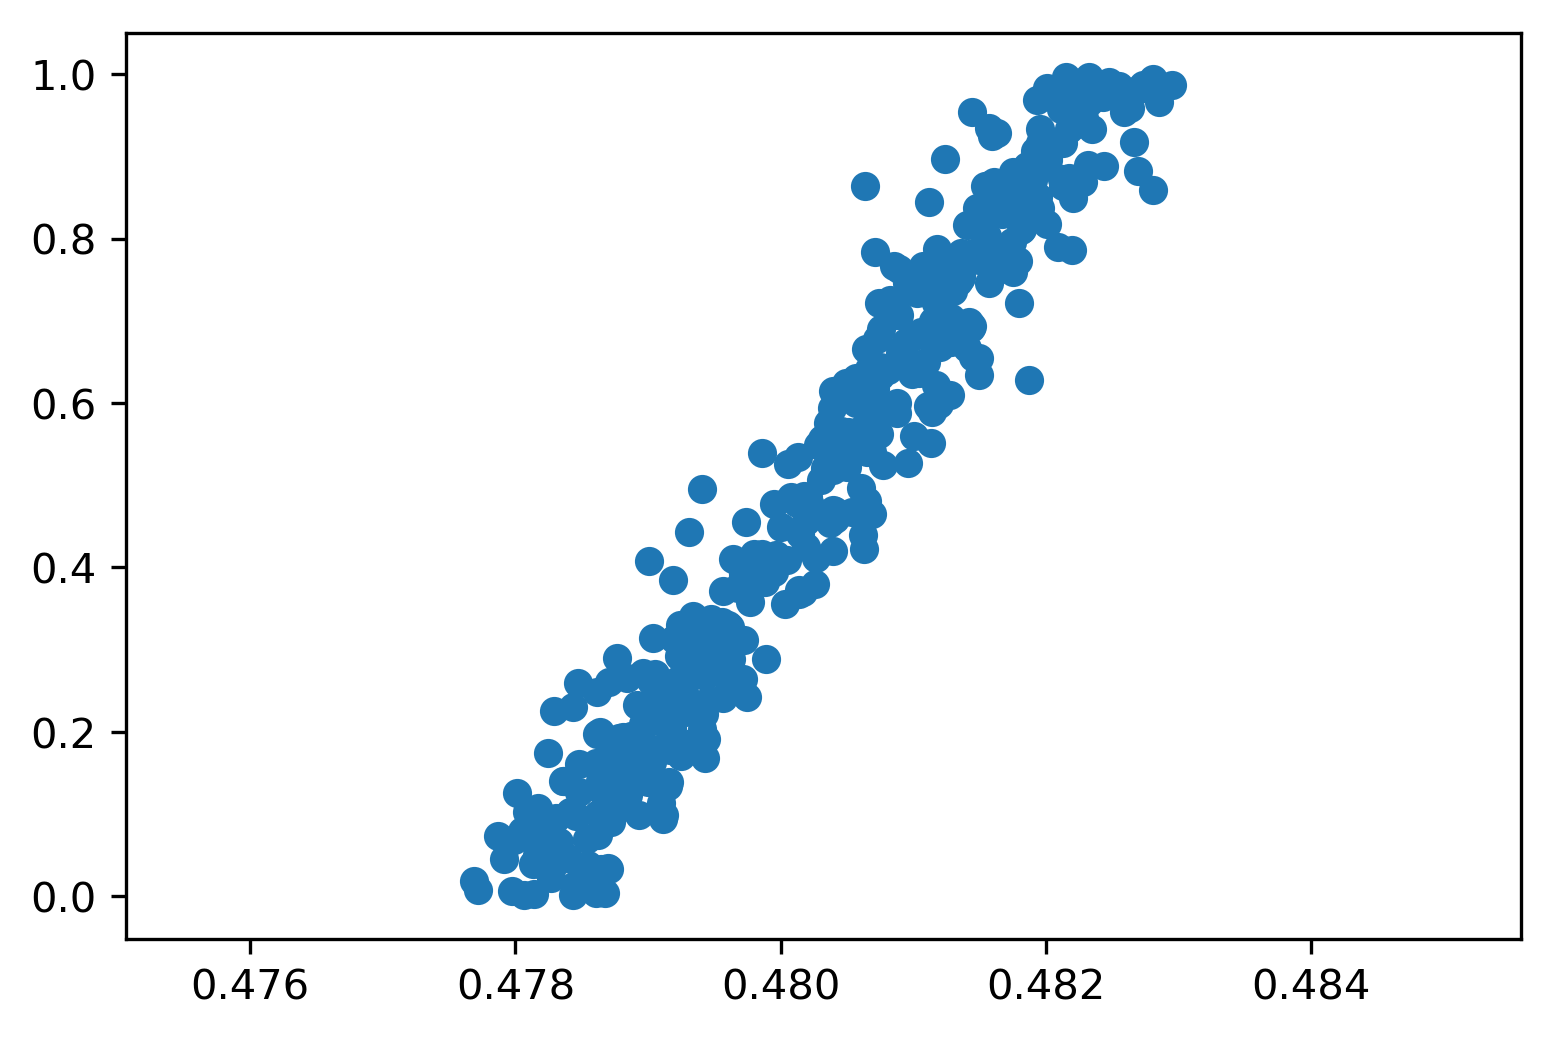

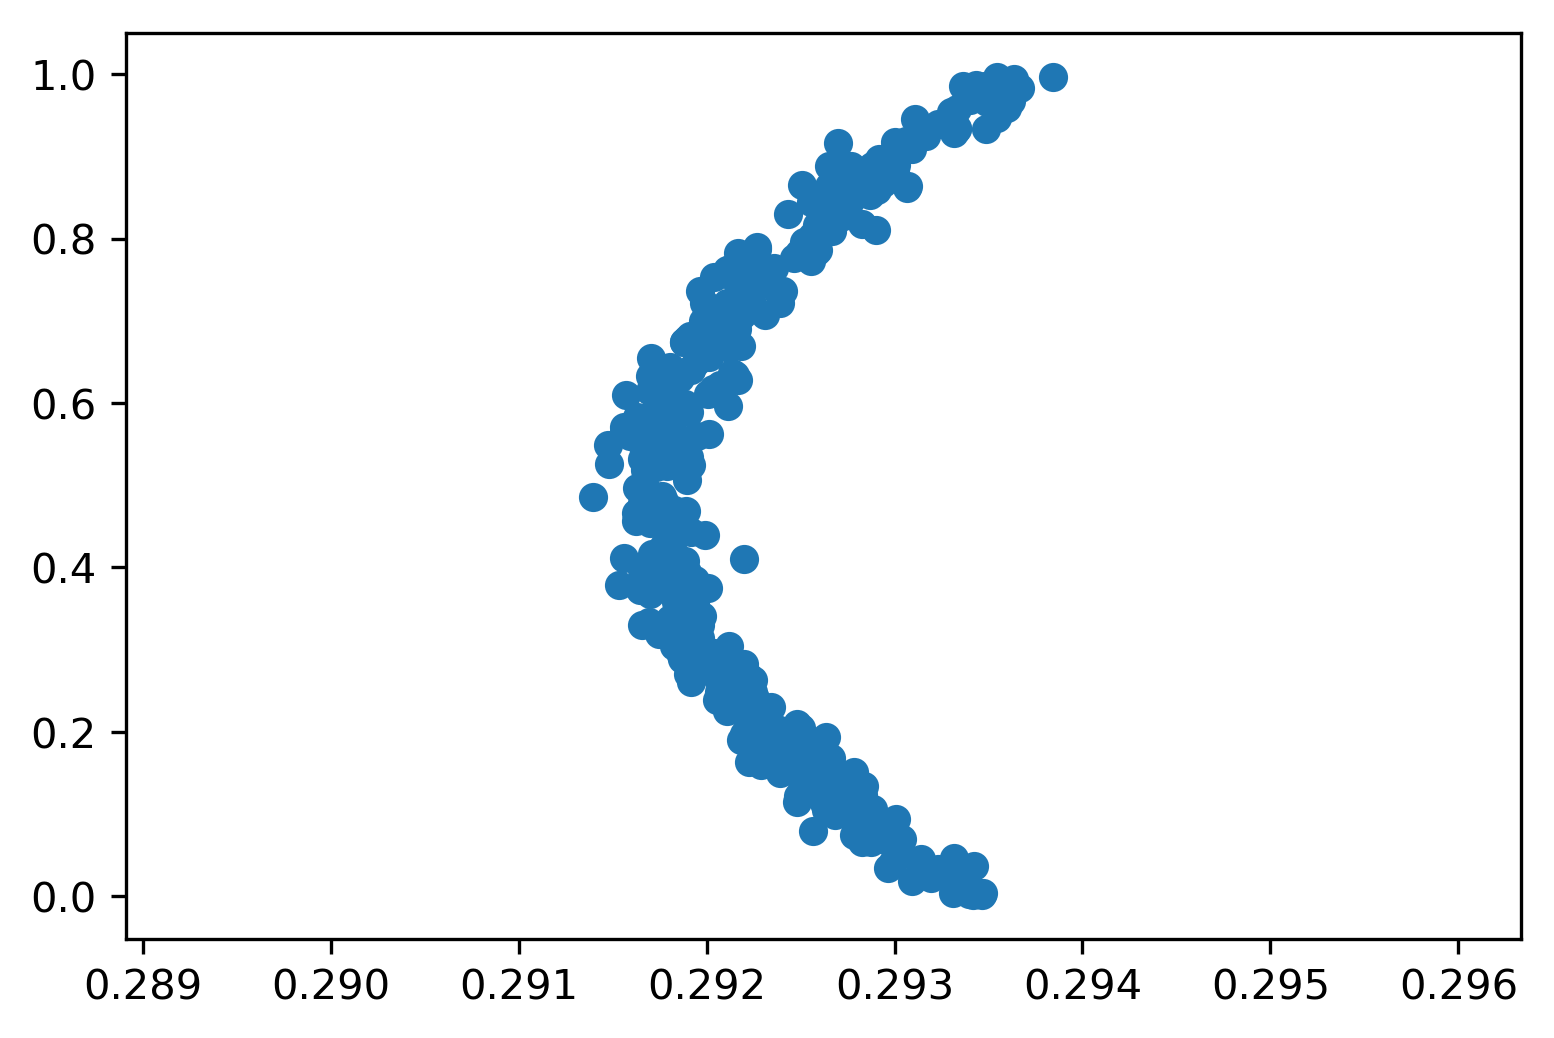

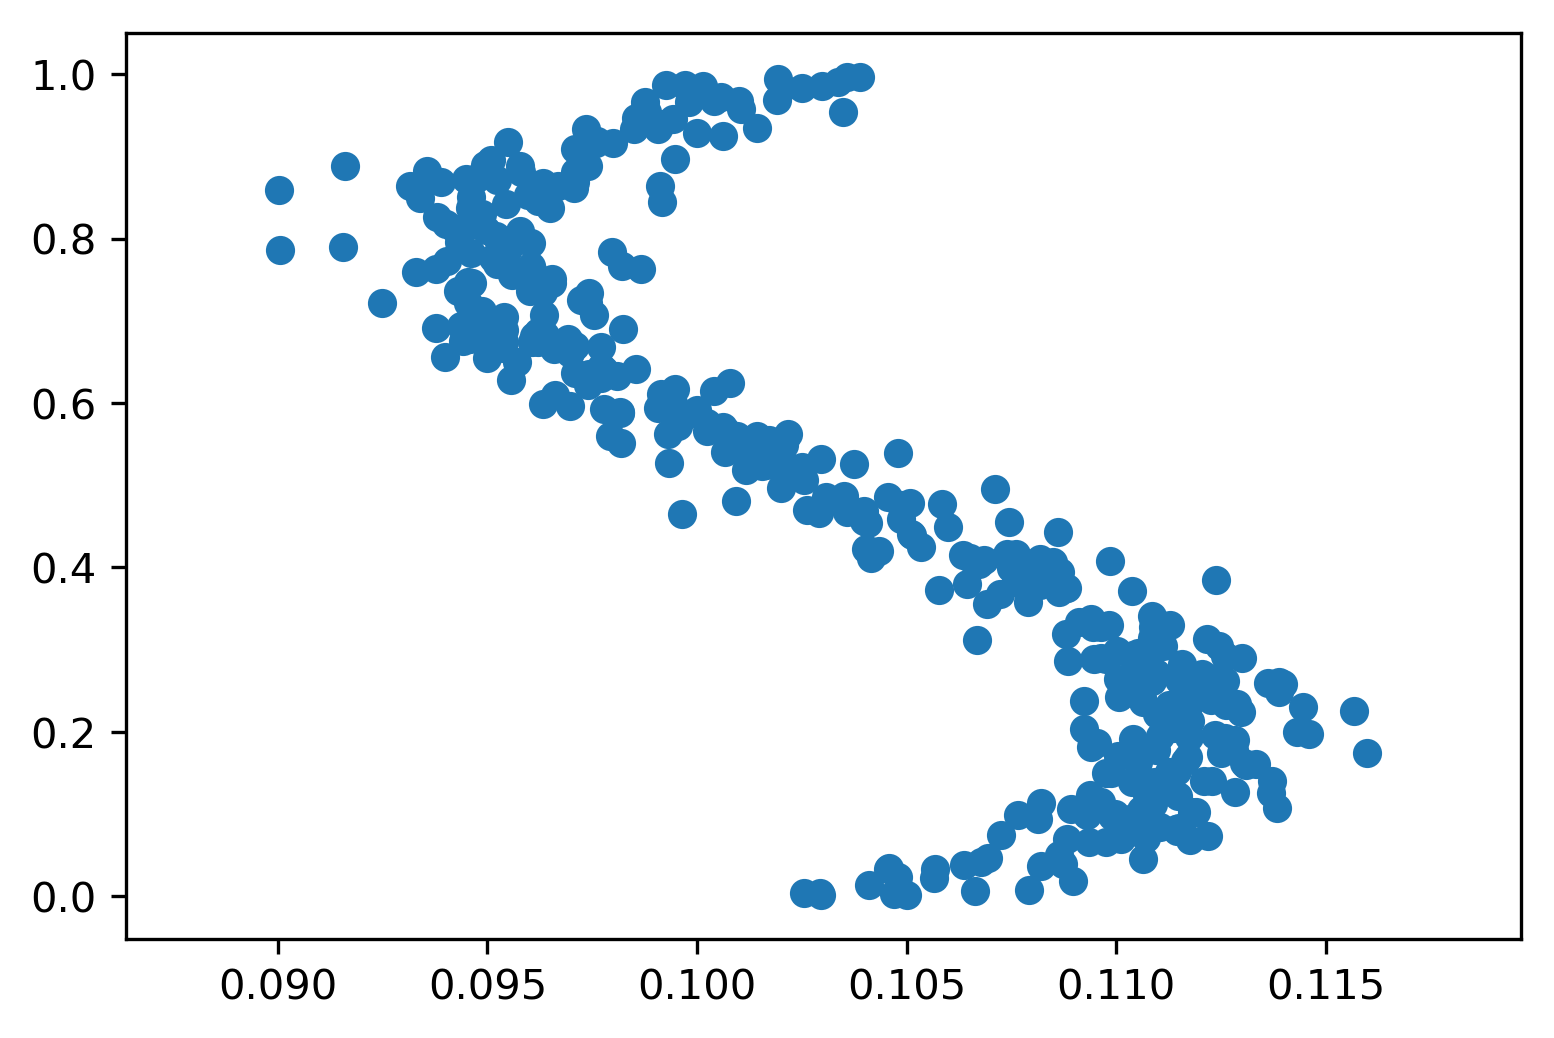

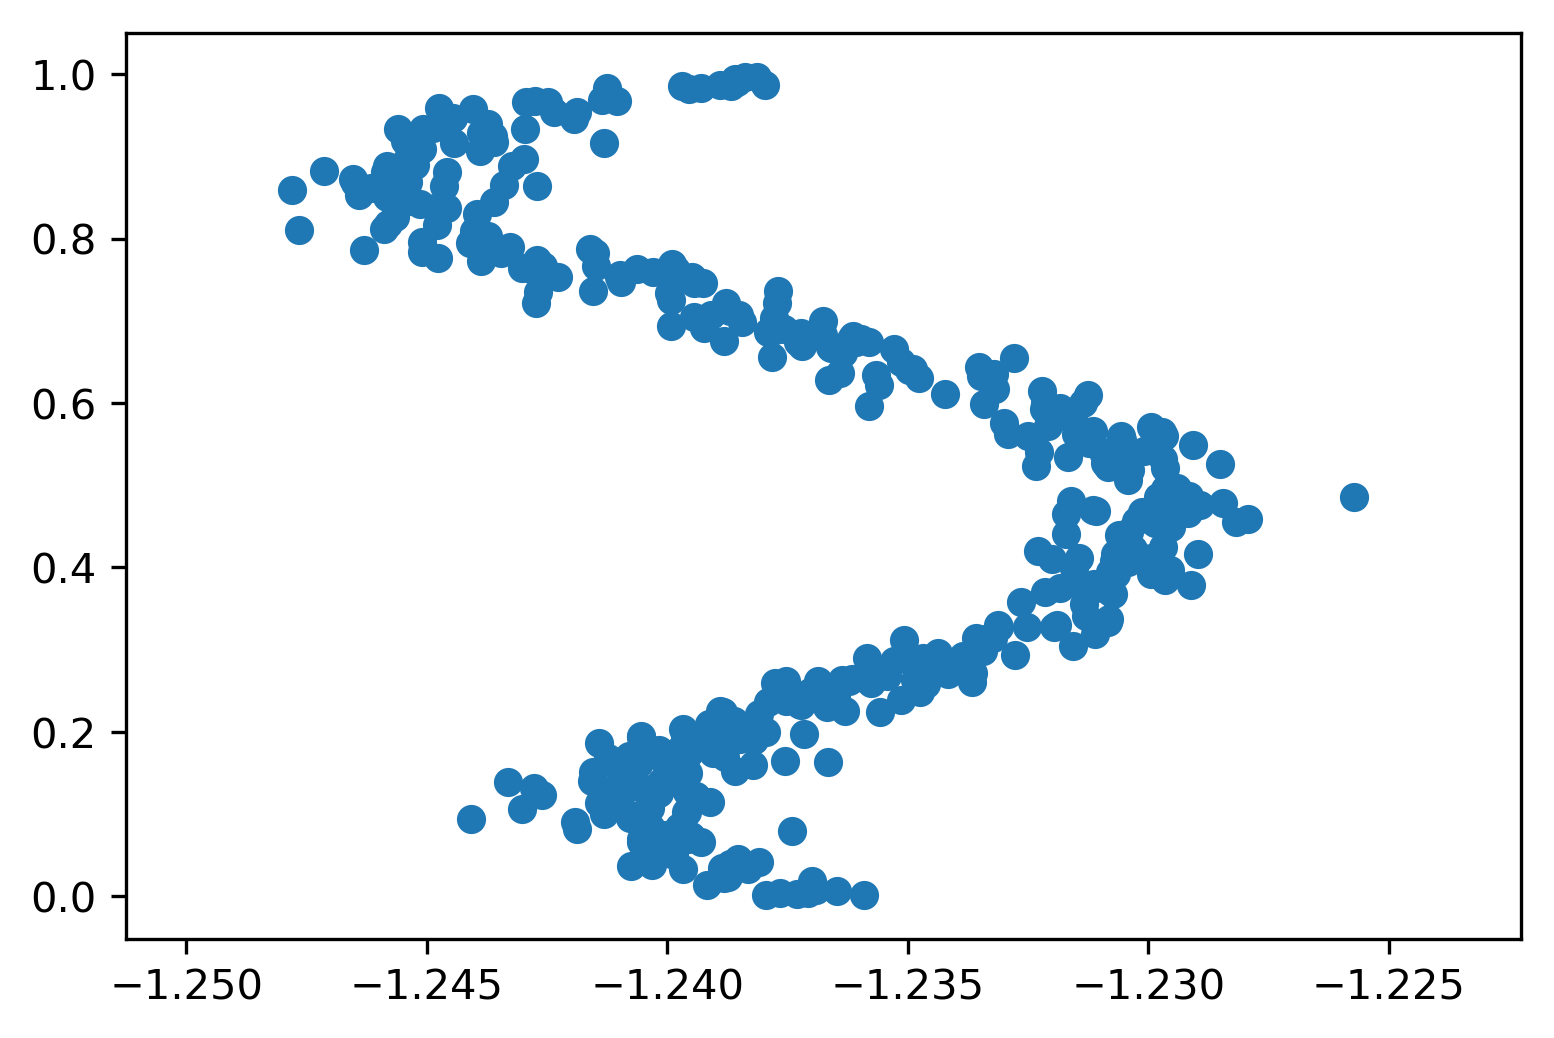

In [16]:
means = np.zeros((400))
stds = np.zeros((400))
skews = np.zeros((400))
kurts = np.zeros((400))

for i in range(400):
    means[i] = r6_la_rand_er_w_extra[49][i]["x_mean"]
    stds[i] = r6_la_rand_er_w_extra[49][i]["x_stds"]
    skews[i] = r6_la_rand_er_w_extra[49][i]["x_skew"]
    kurts[i] = r6_la_rand_er_w_extra[49][i]["x_kurt"]
    
plt.figure(dpi=300)
plt.scatter(means, r5_randNb)

plt.figure(dpi=300)
plt.scatter(stds, r5_randNb)

plt.figure(dpi=300)
plt.scatter(skews, r5_randNb)

plt.figure(dpi=300)
plt.scatter(kurts, r5_randNb)

for i in range(400):
    means[i] = r6_la_rand_er_w_extra[10][i]["x_mean"]
    stds[i] = r6_la_rand_er_w_extra[10][i]["x_stds"]
    skews[i] = r6_la_rand_er_w_extra[10][i]["x_skew"]
    kurts[i] = r6_la_rand_er_w_extra[10][i]["x_kurt"]
    
plt.figure(dpi=300)
plt.scatter(means, r5_randNb)

plt.figure(dpi=300)
plt.scatter(stds, r5_randNb)

plt.figure(dpi=300)
plt.scatter(skews, r5_randNb)

plt.figure(dpi=300)
plt.scatter(kurts, r5_randNb)

EXTRA FIGURES

In [24]:
r1 = np.load("notebook_experiments/data/r1_er100.npy")
la_deg_er = np.load("notebook_experiments/results/r2_la_deg_er.npy")
la_rand_er = np.load("notebook_experiments/results/r2_la_rand_er.npy")
ga_deg_er = np.load("notebook_experiments/results/r2_ga_deg_er.npy")
ga_rand_er = np.load("notebook_experiments/results/r2_ga_rand_er.npy")
w_er = np.load("notebook_experiments/data/r2_w_er.npy")
randNb = np.load("notebook_experiments/data/r2_rand_prop.npy")

In [30]:
la_deg_er.shape

(100, 200)

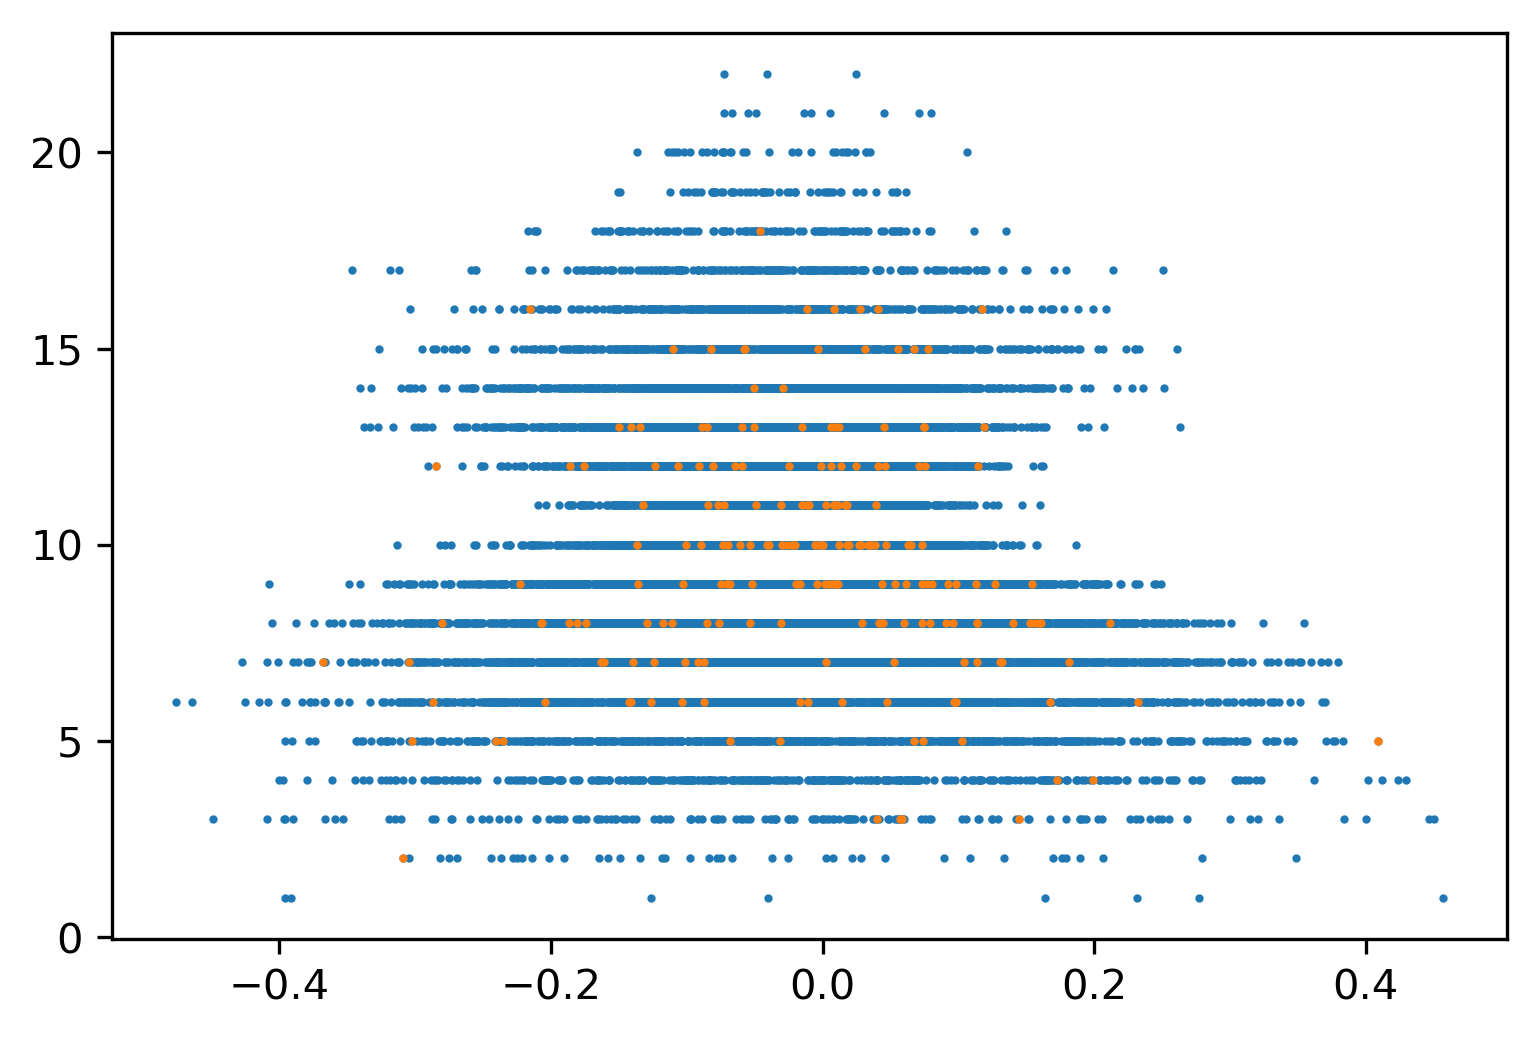

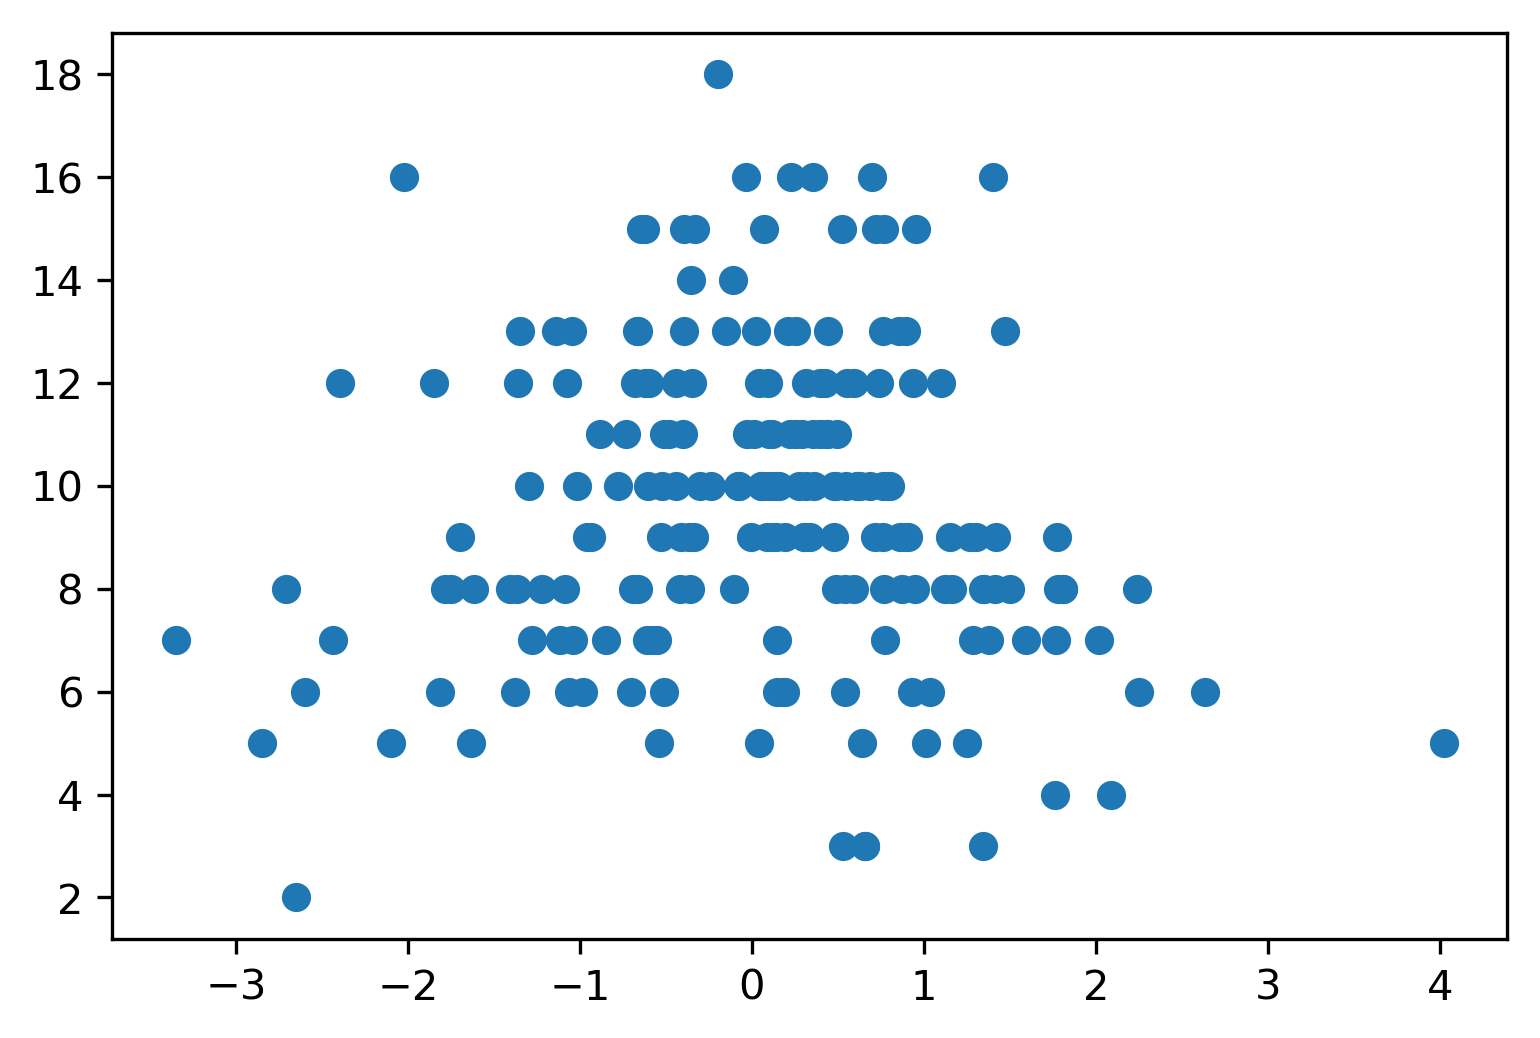

In [32]:
deg_all = np.sum(r1, axis=1).reshape(-1)
la_deg_all = la_deg_er.reshape(-1)

plt.figure(dpi=300)
plt.scatter(la_deg_all, deg_all, s=1, label="null")
plt.scatter(la_deg_er[0,:], np.sum(r1[0,:,:], axis=0), s=1, label="empirical")

zscored = (la_deg_er[0,:] - np.mean(la_deg_er, axis=0))/np.std(la_deg_er, axis=0)
plt.figure(dpi=300)
plt.scatter(zscored, np.sum(r1[0,:,:], axis=0))

Mean Local Assortativity (Degree): -0.02125747175770618
Mean Global Assortativity (Degree): -0.007703620929399848
Mean Local Assortativity (Random): -0.02027906283616502
Mean Global Assortativity (Random): -0.002367999851670066


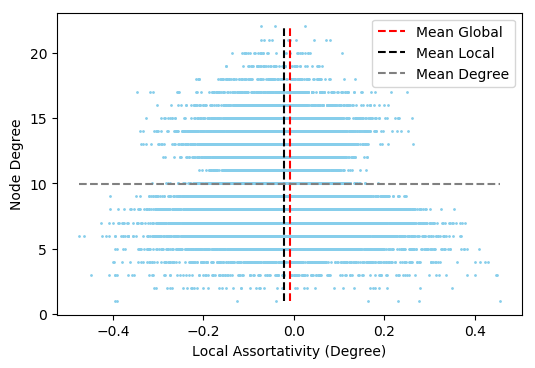

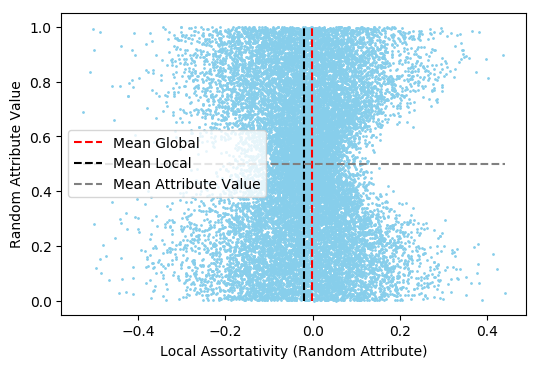

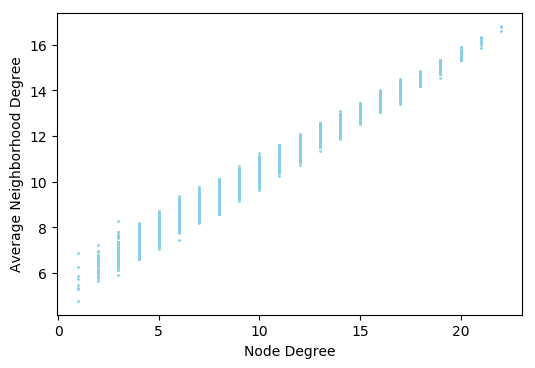

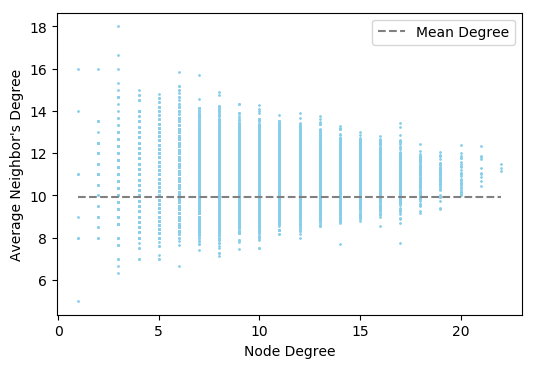

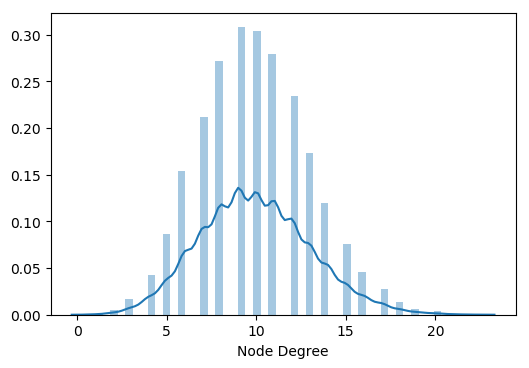

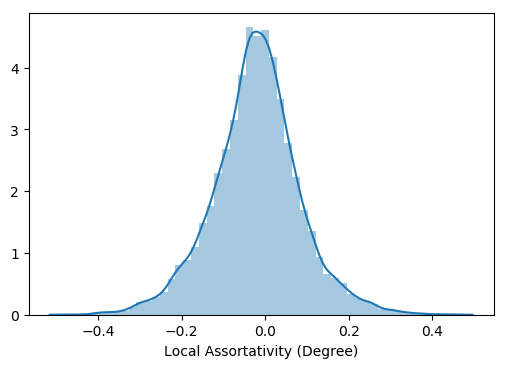

In [26]:
plt.figure(dpi=100)
deg_all = np.sum(r1, axis=1).reshape(-1)
la_deg_all = la_deg_er.reshape(-1)
plt.scatter(la_deg_all, deg_all, c="skyblue", s=1)
plt.plot([np.mean(ga_deg_er), np.mean(ga_deg_er)], [np.amin(deg_all), np.amax(deg_all)], 
         color="red", linestyle="dashed", label="Mean Global")
plt.plot([np.mean(la_deg_all), np.mean(la_deg_all)], [np.amin(deg_all), np.amax(deg_all)], 
         color="black", linestyle="dashed", label="Mean Local")
plt.plot([np.amin(la_deg_all), np.amax(la_deg_all)], [np.mean(deg_all), np.mean(deg_all)], 
         color="gray", linestyle="dashed", label="Mean Degree")
plt.xlabel("Local Assortativity (Degree)")
plt.ylabel("Node Degree")
plt.legend()

plt.figure(dpi=100)
rand_all = randNb.reshape(-1)
la_rand_all = la_rand_er.reshape(-1)
plt.scatter(la_rand_all, rand_all, c="skyblue", s=1)
plt.plot([np.mean(ga_rand_er), np.mean(ga_rand_er)], [np.amin(rand_all), np.amax(rand_all)], 
         color="red", linestyle="dashed", label="Mean Global")
plt.plot([np.mean(la_rand_all), np.mean(la_rand_all)], [np.amin(rand_all), np.amax(rand_all)], 
         color="black", linestyle="dashed", label="Mean Local")
plt.plot([np.amin(la_rand_all), np.amax(la_rand_all)], [np.mean(rand_all), np.mean(rand_all)], 
         color="gray", linestyle="dashed", label="Mean Attribute Value")
plt.xlabel("Local Assortativity (Random Attribute)")
plt.ylabel("Random Attribute Value")
plt.legend()

#For each node in each network, get the mean degree of its direct neighbors
n_deg_all = np.zeros((100,200))
for i in range(100):
    for j in range(200):
        deg = np.sum(r1[i,:,:], axis=0)
        neighbors = r1[i,j,:].copy()
        neighbors[neighbors==0] = np.nan
        neighbors = neighbors * deg
        n_deg_all[i,j] = np.nanmean(neighbors)
n_deg_all = n_deg_all.reshape(-1)

#For each node in each network, get the weighted mean degree of its neighbors (weighted according to multiscale pagerank)
nw_deg_all = np.zeros((100,200))
for i in range(100):
    for j in range(200):
        deg = np.sum(r1[i,:,:], axis=0)
        nw_deg_all[i,j] = np.average(deg, weights=w_er[i,j,:])
nw_deg_all = nw_deg_all.reshape(-1)
        
plt.figure(dpi=100)
plt.scatter(deg_all, nw_deg_all, c="skyblue", s=1)
plt.xlabel("Node Degree")
plt.ylabel("Average Neighborhood Degree")

plt.figure(dpi=100)
plt.scatter(deg_all, n_deg_all, c="skyblue", s=1)
plt.plot([np.amin(deg_all), np.amax(deg_all)], [np.mean(deg_all), np.mean(deg_all)], 
         color="gray", linestyle="dashed", label="Mean Degree")
plt.xlabel("Node Degree")
plt.ylabel("Average Neighbor's Degree")
plt.legend()

plt.figure(dpi=100)
sns.distplot(deg_all)
plt.xlabel("Node Degree")

plt.figure(dpi=100)
sns.distplot(la_deg_all)
plt.xlabel("Local Assortativity (Degree)")

print("Mean Local Assortativity (Degree): "+str(np.mean(la_deg_all)))
print("Mean Global Assortativity (Degree): "+str(np.mean(ga_deg_er)))

print("Mean Local Assortativity (Random): "+str(np.mean(la_rand_all)))
print("Mean Global Assortativity (Random): "+str(np.mean(ga_rand_er)))

In [ ]:
r1 = np.load("notebook_experiments/data/r1_er100.npy")
la_pr_er = np.load("notebook_experiments/results/r7_la_pr_er.npy")
w_pr_er = np.load("notebook_experiments/results/r7_w_pr_er.npy")

In [ ]:
w_pr_er

In [ ]:
np.tile(np.arange(0.02,1.01,0.02),200)

In [ ]:
network_id = 99
deg = np.sum(r1[network_id,:,:], axis=0)
pr_centrality = bct.pagerank_centrality(r1[network_id,:,:], 0.85)
b_centrality = bct.betweenness_bin(r1[network_id,:,:])

plt.figure(dpi=100)
plt.scatter(deg, pr_centrality)

plt.figure(dpi=100)
plt.scatter(deg, b_centrality)

skew_values = np.zeros((50,200))
std_values = []
for i in range(50):
    for j in range(200):
        weights = w_pr_er[network_id,i,j,:]
        skew_values[i,j] = skew(weights)
    la_values = la_pr_er[network_id,i,:].reshape(-1)
    std_values.append(np.std(la_values))
    
plt.figure(dpi=100)
for i in range(200):
    plt.scatter(np.arange(0.02,1.01,0.02), skew_values[:,i], s=1)
plt.xlabel("Alpha")
plt.ylabel("Skewness in weights disrtibution")

corr = np.zeros((50))
for i in range(50):
    corr[i] = pearsonr(skew_values[i,:], deg)[0]
plt.figure(dpi=100)
plt.scatter(np.arange(0.02,1.01,0.02), corr)
    
corr = np.zeros((50))
for i in range(50):
    corr[i] = pearsonr(skew_values[i,:], pr_centrality)[0]
plt.figure(dpi=100)
plt.scatter(np.arange(0.02,1.01,0.02), corr)

corr = np.zeros((50))
for i in range(50):
    corr[i] = pearsonr(skew_values[i,:], b_centrality)[0]
plt.figure(dpi=100)
plt.scatter(np.arange(0.02,1.01,0.02), corr)

plt.figure(dpi=100)
plt.scatter(skew_values[25,:], pr_centrality)

plt.figure(dpi=100)
plt.scatter(skew_values[48,:], pr_centrality)

plt.figure(dpi=100)
plt.scatter(skew_values[25,:], deg)

plt.figure(dpi=100)   
plt.plot(np.arange(0.02,1.01,0.02), std_values)
plt.xlabel("Alpha")
plt.ylabel("Standard Deviation in Local Assortativity")

In [ ]:
std_values = []
for i in range(50):
    la_values = la_pr_er[:,i,:].reshape(-1)
    std_values.append(np.std(la_values))
plt.figure(dpi=300)   
plt.plot(np.arange(0.02,1.01,0.02), std_values)

In [ ]:
plt.figure()
for i in range(35,36):
    sns.distplot(w_pr_er[:,i,:,:].reshape(-1))

FIGURE #2

In [ ]:
ba100 = np.load("notebook_experiments/data/r3_ba100.npy")
la_deg_ba = np.load("notebook_experiments/results/r4_la_deg_ba.npy")
la_rand_ba = np.load("notebook_experiments/results/r4_la_rand_ba.npy")
ga_deg_ba = np.load("notebook_experiments/results/r4_ga_deg_ba.npy")
ga_rand_ba = np.load("notebook_experiments/results/r4_ga_rand_ba.npy")
randNb = np.load("notebook_experiments/data/r2_rand_prop.npy")

In [ ]:
plt.figure(dpi=100)
ba_deg_all = np.sum(ba100, axis=1).reshape(-1)
ba_la_deg_all = la_deg_ba.reshape(-1)
plt.scatter(ba_la_deg_all, ba_deg_all, c="skyblue", s=1)
plt.plot([np.mean(ga_deg_ba), np.mean(ga_deg_ba)], [np.amin(ba_deg_all), np.amax(ba_deg_all)], 
         color="red", linestyle="dashed", label="Mean Global")
plt.plot([np.mean(ba_la_deg_all), np.mean(ba_la_deg_all)], [np.amin(ba_deg_all), np.amax(ba_deg_all)], 
         color="black", linestyle="dashed", label="Mean Local")
plt.plot([np.amin(ba_la_deg_all), np.amax(ba_la_deg_all)], [np.mean(ba_deg_all), np.mean(ba_deg_all)], 
         color="gray", linestyle="dashed", label="Mean Degree")
plt.xlabel("Local Assortativity (Degree)")
plt.ylabel("Node Degree")
plt.legend()

plt.figure(dpi=100)
sns.distplot(ba_deg_all)
plt.xlabel("Node Degree")

plt.figure(dpi=100)
sns.distplot(ba_la_deg_all)
plt.xlabel("Local Assortativity (Degree)")

print("Mean Local Assortativity: "+str(np.mean(ba_la_deg_all)))
print("Mean Global Assortativity: "+str(np.mean(ga_deg_ba)))

EXTRA

In [ ]:
r5 = np.load("notebook_experiments/data/r5_er.npy")
r6_la_deg_er = np.load("notebook_experiments/results/r6_la_deg_er.npy")
r6_ga_deg_er = np.load("notebook_experiments/results/r6_ga_deg_er.npy")

In [ ]:
plt.scatter(r6_la_deg_er, np.sum(r5, axis=0))
print("Global Assortativity: "+str(r6_ga_deg_er))
print("Mean Local Assortativity: "+str(np.mean(r6_la_deg_er)))

In [ ]:
alphas

In [ ]:
xandy = np.zeros((100),dtype=object)
for i in range(100):
    deg = np.sum(r1[i,:,:], axis=0)
    
    X = r1[i,:,:] * deg[:,np.newaxis]
    Y = r1[i,:,:] * deg[np.newaxis,:]
    
    xandy[i] = (X[X>0].reshape(-1),Y[Y>0].reshape(-1))

la,w = m.localAssort(r1[0,:,:], np.sum(r1[0,:,:], axis=0), thorndike=False)

for i in range(10):

    #Get the density of the points (according to their weights in the correlation)
    alphas = (r1[0,:,:] * (w[i,:]/np.sum(r1[0,:,:], axis=0))[:,np.newaxis])[r1[0,:,:]>0].reshape(-1)
    
    rgba_colors = np.zeros((len(alphas),4))
    # for red the first column needs to be one
    rgba_colors[:,0] = 1.0
    # the fourth column needs to be your alphas
    rgba_colors[:, 3] = alphas*5
    
    plt.figure()
    plt.scatter(xandy[0][0],xandy[0][1], color=rgba_colors)
    plt.title(str(m.corr(xandy[0][0], xandy[0][1], alphas))+" vs. "+str(la[i]))